# Human face detector with OpenCV, for comparison with dog breed later

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("D:\Python\deep-learning-v2-pytorch\project-dog-classification\lfw\*\*"))
dog_files = np.array(glob("D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\*\*\*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline  

Number of faces detected: 1


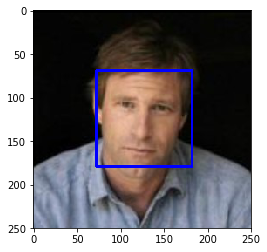

In [132]:
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [133]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [27]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

human_in_human_counter = 0
for humanimage in human_files_short:
    human_in_human_counter += face_detector(humanimage)
print("Human faces detected in human images:", (human_in_human_counter/len(human_files_short))*100, '%')

human_in_dog_counter = 0
for dogimage in dog_files_short:
    human_in_dog_counter += face_detector(dogimage)
print("Human faces detected in dog images:", (human_in_dog_counter/len(dog_files_short))*100, '%')

Human faces detected in human images: 96.0 %
Human faces detected in dog images: 17.0 %


In [147]:
for humanimage in human_files:
    human_in_human_counter += face_detector(humanimage)
print("Human faces detected in human images:", (human_in_human_counter/len(human_files))*100, '%')

Human faces detected in human images: 99.47101942114412 %


# VGG Dog Detector


In [134]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [135]:
import requests

LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
response = requests.get(LABELS_URL)  # Make an HTTP GET request and store the response.
labels = {int(key): value for key, value in response.json().items()}
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [136]:
import torchvision.datasets as datasets

from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    normalize = transforms.Compose([transforms.Resize((224,224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                         std=[0.5, 0.5, 0.5])])
    img = normalize(img)
    img = img.cuda()
    prediction = VGG16(img.unsqueeze(dim=0))
    prediction_index_tensor = torch.max(prediction.data, dim=1)[1]
    prediction_index = prediction_index_tensor.cpu().numpy()[0]

    return prediction_index # predicted class index


In [137]:
def test_VGG16_predict(img_paths, testrange = 20):
    for i in range(testrange):
        print(img_paths[i][-44:-10], ":", VGG16_predict(img_paths[i]), ":", labels[VGG16_predict(img_paths[i])])

test_VGG16_predict(dog_files)

st\001.Affenpinscher\Affenpinscher : 252 : affenpinscher, monkey pinscher, monkey dog
st\001.Affenpinscher\Affenpinscher : 252 : affenpinscher, monkey pinscher, monkey dog
st\001.Affenpinscher\Affenpinscher : 192 : cairn, cairn terrier
st\001.Affenpinscher\Affenpinscher : 204 : Lhasa, Lhasa apso
st\001.Affenpinscher\Affenpinscher : 200 : Tibetan terrier, chrysanthemum dog
st\001.Affenpinscher\Affenpinscher : 204 : Lhasa, Lhasa apso
st\001.Affenpinscher\Affenpinscher : 252 : affenpinscher, monkey pinscher, monkey dog
st\001.Affenpinscher\Affenpinscher : 192 : cairn, cairn terrier
test\002.Afghan_hound\Afghan_hound : 160 : Afghan hound, Afghan
test\002.Afghan_hound\Afghan_hound : 160 : Afghan hound, Afghan
test\002.Afghan_hound\Afghan_hound : 160 : Afghan hound, Afghan
test\002.Afghan_hound\Afghan_hound : 219 : cocker spaniel, English cocker spaniel, cocker
test\002.Afghan_hound\Afghan_hound : 160 : Afghan hound, Afghan
test\002.Afghan_hound\Afghan_hound : 160 : English setter
test\002.A

In [12]:
for i in range(151, 269):
    print(i, ":", labels[i])

151 : Chihuahua
152 : Japanese spaniel
153 : Maltese dog, Maltese terrier, Maltese
154 : Pekinese, Pekingese, Peke
155 : Shih-Tzu
156 : Blenheim spaniel
157 : papillon
158 : toy terrier
159 : Rhodesian ridgeback
160 : Afghan hound, Afghan
161 : basset, basset hound
162 : beagle
163 : bloodhound, sleuthhound
164 : bluetick
165 : black-and-tan coonhound
166 : Walker hound, Walker foxhound
167 : English foxhound
168 : redbone
169 : borzoi, Russian wolfhound
170 : Irish wolfhound
171 : Italian greyhound
172 : whippet
173 : Ibizan hound, Ibizan Podenco
174 : Norwegian elkhound, elkhound
175 : otterhound, otter hound
176 : Saluki, gazelle hound
177 : Scottish deerhound, deerhound
178 : Weimaraner
179 : Staffordshire bullterrier, Staffordshire bull terrier
180 : American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
181 : Bedlington terrier
182 : Border terrier
183 : Kerry blue terrier
184 : Irish terrier
185 : Norfolk terrier
186 : Norwich terrier


In [138]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    if VGG16_predict(img_path) >=151 and VGG16_predict(img_path) <= 268:
        return True
    else:
        return False

In [13]:
### on the images in human_files_short and dog_files_short.
def dog_detect_percentage(img_path):
    dog_detect_count = 0
    for i in range(len(img_path)):
        dog_detect_count += dog_detector(img_path[i])
    print ("Dog files detected in dataset:", (dog_detect_count/len(img_path)*100), "%")

In [11]:
dog_detect_percentage(human_files_short)

Dog files detected in dataset: 0.0 %


In [11]:
dog_detect_percentage(dog_files_short)

Dog files detected in dataset: 93.0 %


In [142]:
#VGG11 = models.vgg11(pretrained=True)
#VGG13 = models.vgg13(pretrained=True)
#VGG16 = models.vgg16(pretrained=True)
VGG19 = models.vgg19(pretrained=True)
#VGG11_BN = models.vgg11_bn(pretrained=True)
#VGG13_BN = models.vgg13_bn(pretrained=True)
#VGG16_BN = models.vgg16_bn(pretrained=True)
#VGG19_BN = models.vgg19_bn(pretrained=True)


use_cuda = torch.cuda.is_available()

if use_cuda:
    #VGG11 = VGG11.cuda()
    #VGG13 = VGG13.cuda()
    #VGG16 = VGG16.cuda()
    VGG19 = VGG19.cuda()
    #VGG11_BN = VGG11_BN.cuda()
    #VGG13_BN = VGG13_BN.cuda()
    #VGG16_BN = VGG16_BN.cuda()
    #VGG19_BN = VGG19_BN.cuda()

In [143]:
def VGG_predict(img_path, vgg='VGG19'):

    img = Image.open(img_path)
    normalize = transforms.Compose([transforms.Resize((224,224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                         std=[0.5, 0.5, 0.5])])
    img = normalize(img)
    img = img.cuda()
    
    if vgg == 'VGG11':
        prediction = VGG11(img.unsqueeze(dim=0))
    elif vgg == 'VGG13':
        prediction = VGG13(img.unsqueeze(dim=0))
    elif vgg == 'VGG16':
        prediction = VGG16(img.unsqueeze(dim=0))    
    elif vgg == 'VGG19':
        prediction = VGG19(img.unsqueeze(dim=0))
    elif vgg == 'VGG11_BN':
        prediction = VGG11_BN(img.unsqueeze(dim=0))
    elif vgg == 'VGG13_BN':
        prediction = VGG13_BN(img.unsqueeze(dim=0))
    elif vgg == 'VGG16_BN':
        prediction = VGG16_BN(img.unsqueeze(dim=0))    
    elif vgg == 'VGG19_BN':
        prediction = VGG19_BN(img.unsqueeze(dim=0))
    else:
        print("Unsupported VGG version input")
        
    prediction_index_tensor = torch.max(prediction.data, dim=1)[1]
    prediction_index = prediction_index_tensor.cpu().numpy()[0]

    return prediction_index # predicted class index

In [18]:
def test_VGG_predict(img_paths, vgg='VGG16', testrange = 20):
    for i in range(testrange):
        print(img_paths[i][-44:-10], ":", VGG_predict(img_paths[i], vgg), ":", labels[VGG_predict(img_paths[i], vgg)])
        
test_VGG_predict(dog_files_short, 'VGG16')

st\001.Affenpinscher\Affenpinscher : 252 : affenpinscher, monkey pinscher, monkey dog
st\001.Affenpinscher\Affenpinscher : 252 : affenpinscher, monkey pinscher, monkey dog
st\001.Affenpinscher\Affenpinscher : 204 : Lhasa, Lhasa apso
st\001.Affenpinscher\Affenpinscher : 252 : affenpinscher, monkey pinscher, monkey dog
st\001.Affenpinscher\Affenpinscher : 200 : Tibetan terrier, chrysanthemum dog
st\001.Affenpinscher\Affenpinscher : 204 : Tibetan terrier, chrysanthemum dog
st\001.Affenpinscher\Affenpinscher : 252 : affenpinscher, monkey pinscher, monkey dog
st\001.Affenpinscher\Affenpinscher : 192 : cairn, cairn terrier
test\002.Afghan_hound\Afghan_hound : 160 : Afghan hound, Afghan
test\002.Afghan_hound\Afghan_hound : 160 : Afghan hound, Afghan
test\002.Afghan_hound\Afghan_hound : 160 : Afghan hound, Afghan
test\002.Afghan_hound\Afghan_hound : 219 : cocker spaniel, English cocker spaniel, cocker
test\002.Afghan_hound\Afghan_hound : 226 : Afghan hound, Afghan
test\002.Afghan_hound\Afghan_

In [144]:
def VGG_dog_detector(img_path, vgg='VGG19'):
    if VGG_predict(img_path, vgg) >=151 and VGG_predict(img_path, vgg) <= 268:
        return True
    else:
        return False
    
def VGG_dog_detect_percentage(img_path, vgg='VGG16'):
    dog_detect_count = 0
    for i in range(len(img_path)):
        dog_detect_count += VGG_dog_detector(img_path[i], vgg)
    print ("Dog files detected in dataset:", (dog_detect_count/len(img_path)*100), "%")   

In [33]:
VGG_dog_detect_percentage(dog_files_short, 'VGG13')

Dog files detected in dataset: 93.0 %


In [27]:
VGG_dog_detect_percentage(dog_files_short, 'VGG13_BN')

Dog files detected in dataset: 50.0 %


In [34]:
VGG_dog_detect_percentage(dog_files_short, 'VGG16')

Dog files detected in dataset: 96.0 %


In [28]:
VGG_dog_detect_percentage(dog_files_short, 'VGG16_BN')

Dog files detected in dataset: 57.99999999999999 %


In [35]:
VGG_dog_detect_percentage(dog_files_short, 'VGG19')

Dog files detected in dataset: 95.0 %


In [38]:
VGG_dog_detect_percentage(dog_files_short, 'VGG19_BN')

Dog files detected in dataset: 64.0 %


## Batch Normalization appears to greatly reduce dog detection performance.

In [40]:
VGG_dog_detect_percentage(dog_files, 'VGG13')

Dog files detected in dataset: 97.54520416716561 %


In [41]:
VGG_dog_detect_percentage(dog_files, 'VGG16')

Dog files detected in dataset: 98.3594779068375 %


In [42]:
VGG_dog_detect_percentage(dog_files, 'VGG19')

Dog files detected in dataset: 98.38342713447491 %


# SE-ResNext50 and NasNet-Mobile Dog Breed Classifiers (without pretraining)

In [3]:
import os
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.optim as optim

use_cuda = torch.cuda.is_available()

# SE-ResNext50

In [16]:
batch_size = 16

train_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\train"
valid_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\valid"
test_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\test"

transform_SEResNext50 = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor(), 
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

train_set_SEResNext50 = datasets.ImageFolder(train_dir, transform=transform_SEResNext50)
train_loader_SEResNext50 = torch.utils.data.DataLoader(train_set_SEResNext50, shuffle=True, batch_size=batch_size)
#train_images, train_labels = next(iter(train_loader))

valid_set_SEResNext50 = datasets.ImageFolder(valid_dir, transform=transform_SEResNext50)
valid_loader_SEResNext50 = torch.utils.data.DataLoader(valid_set_SEResNext50, shuffle=True, batch_size=batch_size)
#valid_images, valid_labels = next(iter(valid_loader))

test_set_SEResNext50 = datasets.ImageFolder(test_dir, transform=transform_SEResNext50)
test_loader_SEResNext50 = torch.utils.data.DataLoader(test_set_SEResNext50, shuffle=True, batch_size=batch_size)
#test_images, test_labels = next(iter(test_loader))

loaders_SEResNext50={'train':train_loader_SEResNext50, 'valid': valid_loader_SEResNext50, 'test':test_loader_SEResNext50}


In [13]:
from __future__ import print_function, division, absolute_import
from collections import OrderedDict
import math

import torch.nn as nn
from torch.utils import model_zoo


class SEModule(nn.Module):

    def __init__(self, channels, reduction):
        super(SEModule, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Conv2d(channels, channels // reduction, kernel_size=1,
                             padding=0)
        self.relu = nn.ReLU(inplace=True)
        self.fc2 = nn.Conv2d(channels // reduction, channels, kernel_size=1,
                             padding=0)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        module_input = x
        x = self.avg_pool(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return module_input * x


class Bottleneck(nn.Module):
    """
    Base class for bottlenecks that implements `forward()` method.
    """
    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out = self.se_module(out) + residual
        out = self.relu(out)

        return out


class SEResNeXtBottleneck(Bottleneck):
    """
    ResNeXt bottleneck type C with a Squeeze-and-Excitation module.
    """
    expansion = 4

    def __init__(self, inplanes, planes, groups, reduction, stride=1,
                 downsample=None, base_width=4):
        super(SEResNeXtBottleneck, self).__init__()
        width = math.floor(planes * (base_width / 64)) * groups
        self.conv1 = nn.Conv2d(inplanes, width, kernel_size=1, bias=False,
                               stride=1)
        self.bn1 = nn.BatchNorm2d(width)
        self.conv2 = nn.Conv2d(width, width, kernel_size=3, stride=stride,
                               padding=1, groups=groups, bias=False)
        self.bn2 = nn.BatchNorm2d(width)
        self.conv3 = nn.Conv2d(width, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.se_module = SEModule(planes * 4, reduction=reduction)
        self.downsample = downsample
        self.stride = stride


class SENet(nn.Module):

    def __init__(self, block, layers, groups, reduction, dropout_p=0.2,
                 inplanes=128, input_3x3=True, downsample_kernel_size=3,
                 downsample_padding=1, num_classes=1000):
        """
        Parameters
        ----------
        block (nn.Module): Bottleneck class.
            - For SENet154: SEBottleneck
            - For SE-ResNet models: SEResNetBottleneck
            - For SE-ResNeXt models:  SEResNeXtBottleneck
        layers (list of ints): Number of residual blocks for 4 layers of the
            network (layer1...layer4).
        groups (int): Number of groups for the 3x3 convolution in each
            bottleneck block.
            - For SENet154: 64
            - For SE-ResNet models: 1
            - For SE-ResNeXt models:  32
        reduction (int): Reduction ratio for Squeeze-and-Excitation modules.
            - For all models: 16
        dropout_p (float or None): Drop probability for the Dropout layer.
            If `None` the Dropout layer is not used.
            - For SENet154: 0.2
            - For SE-ResNet models: None
            - For SE-ResNeXt models: None
        inplanes (int):  Number of input channels for layer1.
            - For SENet154: 128
            - For SE-ResNet models: 64
            - For SE-ResNeXt models: 64
        input_3x3 (bool): If `True`, use three 3x3 convolutions instead of
            a single 7x7 convolution in layer0.
            - For SENet154: True
            - For SE-ResNet models: False
            - For SE-ResNeXt models: False
        downsample_kernel_size (int): Kernel size for downsampling convolutions
            in layer2, layer3 and layer4.
            - For SENet154: 3
            - For SE-ResNet models: 1
            - For SE-ResNeXt models: 1
        downsample_padding (int): Padding for downsampling convolutions in
            layer2, layer3 and layer4.
            - For SENet154: 1
            - For SE-ResNet models: 0
            - For SE-ResNeXt models: 0
        num_classes (int): Number of outputs in `last_linear` layer.
            - For all models: 1000
        """
        super(SENet, self).__init__()
        self.inplanes = inplanes
        if input_3x3:
            layer0_modules = [
                ('conv1', nn.Conv2d(3, 64, 3, stride=2, padding=1,
                                    bias=False)),
                ('bn1', nn.BatchNorm2d(64)),
                ('relu1', nn.ReLU(inplace=True)),
                ('conv2', nn.Conv2d(64, 64, 3, stride=1, padding=1,
                                    bias=False)),
                ('bn2', nn.BatchNorm2d(64)),
                ('relu2', nn.ReLU(inplace=True)),
                ('conv3', nn.Conv2d(64, inplanes, 3, stride=1, padding=1,
                                    bias=False)),
                ('bn3', nn.BatchNorm2d(inplanes)),
                ('relu3', nn.ReLU(inplace=True)),
            ]
        else:
            layer0_modules = [
                ('conv1', nn.Conv2d(3, inplanes, kernel_size=7, stride=2,
                                    padding=3, bias=False)),
                ('bn1', nn.BatchNorm2d(inplanes)),
                ('relu1', nn.ReLU(inplace=True)),
            ]
        # To preserve compatibility with Caffe weights `ceil_mode=True`
        # is used instead of `padding=1`.
        layer0_modules.append(('pool', nn.MaxPool2d(3, stride=2,
                                                    ceil_mode=True)))
        self.layer0 = nn.Sequential(OrderedDict(layer0_modules))
        self.layer1 = self._make_layer(
            block,
            planes=64,
            blocks=layers[0],
            groups=groups,
            reduction=reduction,
            downsample_kernel_size=1,
            downsample_padding=0
        )
        self.layer2 = self._make_layer(
            block,
            planes=128,
            blocks=layers[1],
            stride=2,
            groups=groups,
            reduction=reduction,
            downsample_kernel_size=downsample_kernel_size,
            downsample_padding=downsample_padding
        )
        self.layer3 = self._make_layer(
            block,
            planes=256,
            blocks=layers[2],
            stride=2,
            groups=groups,
            reduction=reduction,
            downsample_kernel_size=downsample_kernel_size,
            downsample_padding=downsample_padding
        )
        self.layer4 = self._make_layer(
            block,
            planes=512,
            blocks=layers[3],
            stride=2,
            groups=groups,
            reduction=reduction,
            downsample_kernel_size=downsample_kernel_size,
            downsample_padding=downsample_padding
        )
        self.avg_pool = nn.AvgPool2d(7, stride=1)
        self.dropout = nn.Dropout(dropout_p) if dropout_p is not None else None
        self.last_linear = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, blocks, groups, reduction, stride=1,
                    downsample_kernel_size=1, downsample_padding=0):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=downsample_kernel_size, stride=stride,
                          padding=downsample_padding, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, groups, reduction, stride,
                            downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups, reduction))

        return nn.Sequential(*layers)

    def features(self, x):
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

    def logits(self, x):
        x = self.avg_pool(x)
        if self.dropout is not None:
            x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.last_linear(x)
        return x

    def forward(self, x):
        x = self.features(x)
        x = self.logits(x)
        return x


def se_resnext50_32x4d(num_classes=1000):
    model = SENet(SEResNeXtBottleneck, [3, 4, 6, 3], groups=32, reduction=16,
                  dropout_p=None, inplanes=64, input_3x3=False,
                  downsample_kernel_size=1, downsample_padding=0,
                  num_classes=num_classes)
    return model


def se_resnext101_32x4d(num_classes=1000):
    model = SENet(SEResNeXtBottleneck, [3, 4, 23, 3], groups=32, reduction=16,
                  dropout_p=None, inplanes=64, input_3x3=False,
                  downsample_kernel_size=1, downsample_padding=0,
                  num_classes=num_classes)
    return model

# instantiate the CNN
model_SEResNext50 = se_resnext50_32x4d(num_classes=133)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_SEResNext50.cuda()

In [14]:
criterion_SEResNext50 = nn.CrossEntropyLoss()

optimizer_SEResNext50 = optim.SGD(model_SEResNext50.parameters(), lr=0.01)

### Train

In [6]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
   
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
                
        start = time.time()
        
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                        
            if batch_idx % 200 == 0:
                print(epoch, ':', batch_idx, 'train_loss:', train_loss)
                
        end = time.time()
        print('Elapsed Epoch Training Time:', end - start)
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
      
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        # save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
     
    # return trained model
    return model


In [7]:
model_SEResNext50.load_state_dict(torch.load('model_SEResNext50.pt'))

# train the model
model_SEResNext50 = train(20, loaders_SEResNext50, model_SEResNext50, optimizer_SEResNext50, 
                      criterion_SEResNext50, use_cuda, 'model_SEResNext50.pt')

1 : 0 train_loss: tensor(4.0100, device='cuda:0')
1 : 100 train_loss: tensor(4.2383, device='cuda:0')
1 : 200 train_loss: tensor(4.2141, device='cuda:0')
1 : 300 train_loss: tensor(4.2021, device='cuda:0')
1 : 400 train_loss: tensor(4.1913, device='cuda:0')
Elapsed Epoch Training Time: 190.8930904865265
Epoch: 1 	Training Loss: 4.189122 	Validation Loss: 4.479331
Validation loss decreased (inf --> 4.479331).  Saving model ...
2 : 0 train_loss: tensor(4.3610, device='cuda:0')
2 : 100 train_loss: tensor(4.1123, device='cuda:0')
2 : 200 train_loss: tensor(4.0983, device='cuda:0')
2 : 300 train_loss: tensor(4.0929, device='cuda:0')
2 : 400 train_loss: tensor(4.0757, device='cuda:0')
Elapsed Epoch Training Time: 196.31233763694763
Epoch: 2 	Training Loss: 4.073340 	Validation Loss: 4.838991
3 : 0 train_loss: tensor(3.9705, device='cuda:0')
3 : 100 train_loss: tensor(3.9702, device='cuda:0')
3 : 200 train_loss: tensor(3.9625, device='cuda:0')
3 : 300 train_loss: tensor(3.9627, device='cuda:0

### Test

In [7]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [9]:
# call test function    
test(loaders_SEResNext50, model_SEResNext50, criterion_SEResNext50, use_cuda)

Test Loss: 4.050294


Test Accuracy: 11% (98/836)


In [17]:
# load the model that got the best validation accuracy
model_SEResNext50.load_state_dict(torch.load('model_SEResNext50.pt'))
# call test function    
test(loaders_SEResNext50, model_SEResNext50, criterion_SEResNext50, use_cuda)

Test Loss: 4.022505


Test Accuracy: 11% (98/836)


# NasNet Mobile

In [6]:
batch_size = 16

train_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\train"
valid_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\valid"
test_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\test"

transform_NasNetAMobile = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor(), 
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

train_set_NasNetAMobile = datasets.ImageFolder(train_dir, transform=transform_NasNetAMobile)
train_loader_NasNetAMobile = torch.utils.data.DataLoader(train_set_NasNetAMobile, shuffle=True, batch_size=batch_size)
#train_images, train_labels = next(iter(train_loader))

valid_set_NasNetAMobile = datasets.ImageFolder(valid_dir, transform=transform_NasNetAMobile)
valid_loader_NasNetAMobile = torch.utils.data.DataLoader(valid_set_NasNetAMobile, shuffle=True, batch_size=batch_size)
#valid_images, valid_labels = next(iter(valid_loader))

test_set_NasNetAMobile = datasets.ImageFolder(test_dir, transform=transform_NasNetAMobile)
test_loader_NasNetAMobile = torch.utils.data.DataLoader(test_set_NasNetAMobile, shuffle=True, batch_size=batch_size)
#test_images, test_labels = next(iter(test_loader))

loaders_NasNetAMobile={'train':train_loader_NasNetAMobile, 'valid': valid_loader_NasNetAMobile, 'test':test_loader_NasNetAMobile}

In [7]:
from __future__ import print_function, division, absolute_import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from torch.autograd import Variable
import numpy as np


class MaxPoolPad(nn.Module):

    def __init__(self):
        super(MaxPoolPad, self).__init__()
        self.pad = nn.ZeroPad2d((1, 0, 1, 0))
        self.pool = nn.MaxPool2d(3, stride=2, padding=1)

    def forward(self, x):
        x = self.pad(x)
        x = self.pool(x)
        x = x[:, :, 1:, 1:].contiguous()
        return x


class AvgPoolPad(nn.Module):

    def __init__(self, stride=2, padding=1):
        super(AvgPoolPad, self).__init__()
        self.pad = nn.ZeroPad2d((1, 0, 1, 0))
        self.pool = nn.AvgPool2d(3, stride=stride, padding=padding, count_include_pad=False)

    def forward(self, x):
        x = self.pad(x)
        x = self.pool(x)
        x = x[:, :, 1:, 1:].contiguous()
        return x


class SeparableConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, dw_kernel, dw_stride, dw_padding, bias=False):
        super(SeparableConv2d, self).__init__()
        self.depthwise_conv2d = nn.Conv2d(in_channels, in_channels, dw_kernel,
                                          stride=dw_stride,
                                          padding=dw_padding,
                                          bias=bias,
                                          groups=in_channels)
        self.pointwise_conv2d = nn.Conv2d(in_channels, out_channels, 1, stride=1, bias=bias)

    def forward(self, x):
        x = self.depthwise_conv2d(x)
        x = self.pointwise_conv2d(x)
        return x


class BranchSeparables(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, name=None, bias=False):
        super(BranchSeparables, self).__init__()
        self.relu = nn.ReLU()
        self.separable_1 = SeparableConv2d(in_channels, in_channels, kernel_size, stride, padding, bias=bias)
        self.bn_sep_1 = nn.BatchNorm2d(in_channels, eps=0.001, momentum=0.1, affine=True)
        self.relu1 = nn.ReLU()
        self.separable_2 = SeparableConv2d(in_channels, out_channels, kernel_size, 1, padding, bias=bias)
        self.bn_sep_2 = nn.BatchNorm2d(out_channels, eps=0.001, momentum=0.1, affine=True)
        self.name = name

    def forward(self, x):
        x = self.relu(x)
        if self.name == 'specific':
            x = nn.ZeroPad2d((1, 0, 1, 0))(x)
        x = self.separable_1(x)
        if self.name == 'specific':
            x = x[:, :, 1:, 1:].contiguous()

        x = self.bn_sep_1(x)
        x = self.relu1(x)
        x = self.separable_2(x)
        x = self.bn_sep_2(x)
        return x


class BranchSeparablesStem(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, bias=False):
        super(BranchSeparablesStem, self).__init__()
        self.relu = nn.ReLU()
        self.separable_1 = SeparableConv2d(in_channels, out_channels, kernel_size, stride, padding, bias=bias)
        self.bn_sep_1 = nn.BatchNorm2d(out_channels, eps=0.001, momentum=0.1, affine=True)
        self.relu1 = nn.ReLU()
        self.separable_2 = SeparableConv2d(out_channels, out_channels, kernel_size, 1, padding, bias=bias)
        self.bn_sep_2 = nn.BatchNorm2d(out_channels, eps=0.001, momentum=0.1, affine=True)

    def forward(self, x):
        x = self.relu(x)
        x = self.separable_1(x)
        x = self.bn_sep_1(x)
        x = self.relu1(x)
        x = self.separable_2(x)
        x = self.bn_sep_2(x)
        return x


class BranchSeparablesReduction(BranchSeparables):

    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, z_padding=1, bias=False):
        BranchSeparables.__init__(self, in_channels, out_channels, kernel_size, stride, padding, bias)
        self.padding = nn.ZeroPad2d((z_padding, 0, z_padding, 0))

    def forward(self, x):
        x = self.relu(x)
        x = self.padding(x)
        x = self.separable_1(x)
        x = x[:, :, 1:, 1:].contiguous()
        x = self.bn_sep_1(x)
        x = self.relu1(x)
        x = self.separable_2(x)
        x = self.bn_sep_2(x)
        return x


class CellStem0(nn.Module):
    def __init__(self, stem_filters, num_filters=42):
        super(CellStem0, self).__init__()
        self.num_filters = num_filters
        self.stem_filters = stem_filters
        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(self.stem_filters, self.num_filters, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(self.num_filters, eps=0.001, momentum=0.1, affine=True))

        self.comb_iter_0_left = BranchSeparables(self.num_filters, self.num_filters, 5, 2, 2)
        self.comb_iter_0_right = BranchSeparablesStem(self.stem_filters, self.num_filters, 7, 2, 3, bias=False)

        self.comb_iter_1_left = nn.MaxPool2d(3, stride=2, padding=1)
        self.comb_iter_1_right = BranchSeparablesStem(self.stem_filters, self.num_filters, 7, 2, 3, bias=False)

        self.comb_iter_2_left = nn.AvgPool2d(3, stride=2, padding=1, count_include_pad=False)
        self.comb_iter_2_right = BranchSeparablesStem(self.stem_filters, self.num_filters, 5, 2, 2, bias=False)

        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparables(self.num_filters, self.num_filters, 3, 1, 1, bias=False)
        self.comb_iter_4_right = nn.MaxPool2d(3, stride=2, padding=1)

    def forward(self, x):
        x1 = self.conv_1x1(x)

        x_comb_iter_0_left = self.comb_iter_0_left(x1)
        x_comb_iter_0_right = self.comb_iter_0_right(x)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x1)
        x_comb_iter_1_right = self.comb_iter_1_right(x)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x1)
        x_comb_iter_2_right = self.comb_iter_2_right(x)
        x_comb_iter_2 = x_comb_iter_2_left + x_comb_iter_2_right

        x_comb_iter_3_right = self.comb_iter_3_right(x_comb_iter_0)
        x_comb_iter_3 = x_comb_iter_3_right + x_comb_iter_1

        x_comb_iter_4_left = self.comb_iter_4_left(x_comb_iter_0)
        x_comb_iter_4_right = self.comb_iter_4_right(x1)
        x_comb_iter_4 = x_comb_iter_4_left + x_comb_iter_4_right

        x_out = torch.cat([x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class CellStem1(nn.Module):

    def __init__(self, stem_filters, num_filters):
        super(CellStem1, self).__init__()
        self.num_filters = num_filters
        self.stem_filters = stem_filters
        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(2*self.num_filters, self.num_filters, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(self.num_filters, eps=0.001, momentum=0.1, affine=True))

        self.relu = nn.ReLU()
        self.path_1 = nn.Sequential()
        self.path_1.add_module('avgpool', nn.AvgPool2d(1, stride=2, count_include_pad=False))
        self.path_1.add_module('conv', nn.Conv2d(self.stem_filters, self.num_filters//2, 1, stride=1, bias=False))
        self.path_2 = nn.ModuleList()
        self.path_2.add_module('pad', nn.ZeroPad2d((0, 1, 0, 1)))
        self.path_2.add_module('avgpool', nn.AvgPool2d(1, stride=2, count_include_pad=False))
        self.path_2.add_module('conv', nn.Conv2d(self.stem_filters, self.num_filters//2, 1, stride=1, bias=False))

        self.final_path_bn = nn.BatchNorm2d(self.num_filters, eps=0.001, momentum=0.1, affine=True)

        self.comb_iter_0_left = BranchSeparables(self.num_filters, self.num_filters, 5, 2, 2, name='specific', bias=False)
        self.comb_iter_0_right = BranchSeparables(self.num_filters, self.num_filters, 7, 2, 3, name='specific', bias=False)

        # self.comb_iter_1_left = nn.MaxPool2d(3, stride=2, padding=1)
        self.comb_iter_1_left = MaxPoolPad()
        self.comb_iter_1_right = BranchSeparables(self.num_filters, self.num_filters, 7, 2, 3, name='specific', bias=False)

        # self.comb_iter_2_left = nn.AvgPool2d(3, stride=2, padding=1, count_include_pad=False)
        self.comb_iter_2_left = AvgPoolPad()
        self.comb_iter_2_right = BranchSeparables(self.num_filters, self.num_filters, 5, 2, 2, name='specific', bias=False)

        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparables(self.num_filters, self.num_filters, 3, 1, 1, name='specific', bias=False)
        # self.comb_iter_4_right = nn.MaxPool2d(3, stride=2, padding=1)
        self.comb_iter_4_right = MaxPoolPad()

    def forward(self, x_conv0, x_stem_0):
        x_left = self.conv_1x1(x_stem_0)

        x_relu = self.relu(x_conv0)
        # path 1
        x_path1 = self.path_1(x_relu)
        # path 2
        x_path2 = self.path_2.pad(x_relu)
        x_path2 = x_path2[:, :, 1:, 1:]
        x_path2 = self.path_2.avgpool(x_path2)
        x_path2 = self.path_2.conv(x_path2)
        # final path
        x_right = self.final_path_bn(torch.cat([x_path1, x_path2], 1))

        x_comb_iter_0_left = self.comb_iter_0_left(x_left)
        x_comb_iter_0_right = self.comb_iter_0_right(x_right)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x_left)
        x_comb_iter_1_right = self.comb_iter_1_right(x_right)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x_left)
        x_comb_iter_2_right = self.comb_iter_2_right(x_right)
        x_comb_iter_2 = x_comb_iter_2_left + x_comb_iter_2_right

        x_comb_iter_3_right = self.comb_iter_3_right(x_comb_iter_0)
        x_comb_iter_3 = x_comb_iter_3_right + x_comb_iter_1

        x_comb_iter_4_left = self.comb_iter_4_left(x_comb_iter_0)
        x_comb_iter_4_right = self.comb_iter_4_right(x_left)
        x_comb_iter_4 = x_comb_iter_4_left + x_comb_iter_4_right

        x_out = torch.cat([x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class FirstCell(nn.Module):

    def __init__(self, in_channels_left, out_channels_left, in_channels_right, out_channels_right):
        super(FirstCell, self).__init__()
        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(in_channels_right, out_channels_right, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(out_channels_right, eps=0.001, momentum=0.1, affine=True))

        self.relu = nn.ReLU()
        self.path_1 = nn.Sequential()
        self.path_1.add_module('avgpool', nn.AvgPool2d(1, stride=2, count_include_pad=False))
        self.path_1.add_module('conv', nn.Conv2d(in_channels_left, out_channels_left, 1, stride=1, bias=False))
        self.path_2 = nn.ModuleList()
        self.path_2.add_module('pad', nn.ZeroPad2d((0, 1, 0, 1)))
        self.path_2.add_module('avgpool', nn.AvgPool2d(1, stride=2, count_include_pad=False))
        self.path_2.add_module('conv', nn.Conv2d(in_channels_left, out_channels_left, 1, stride=1, bias=False))

        self.final_path_bn = nn.BatchNorm2d(out_channels_left * 2, eps=0.001, momentum=0.1, affine=True)

        self.comb_iter_0_left = BranchSeparables(out_channels_right, out_channels_right, 5, 1, 2, bias=False)
        self.comb_iter_0_right = BranchSeparables(out_channels_right, out_channels_right, 3, 1, 1, bias=False)

        self.comb_iter_1_left = BranchSeparables(out_channels_right, out_channels_right, 5, 1, 2, bias=False)
        self.comb_iter_1_right = BranchSeparables(out_channels_right, out_channels_right, 3, 1, 1, bias=False)

        self.comb_iter_2_left = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_3_left = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)
        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparables(out_channels_right, out_channels_right, 3, 1, 1, bias=False)

    def forward(self, x, x_prev):
        x_relu = self.relu(x_prev)
        # path 1
        x_path1 = self.path_1(x_relu)
        # path 2
        x_path2 = self.path_2.pad(x_relu)
        x_path2 = x_path2[:, :, 1:, 1:]
        x_path2 = self.path_2.avgpool(x_path2)
        x_path2 = self.path_2.conv(x_path2)
        # final path
        x_left = self.final_path_bn(torch.cat([x_path1, x_path2], 1))

        x_right = self.conv_1x1(x)

        x_comb_iter_0_left = self.comb_iter_0_left(x_right)
        x_comb_iter_0_right = self.comb_iter_0_right(x_left)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x_left)
        x_comb_iter_1_right = self.comb_iter_1_right(x_left)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x_right)
        x_comb_iter_2 = x_comb_iter_2_left + x_left

        x_comb_iter_3_left = self.comb_iter_3_left(x_left)
        x_comb_iter_3_right = self.comb_iter_3_right(x_left)
        x_comb_iter_3 = x_comb_iter_3_left + x_comb_iter_3_right

        x_comb_iter_4_left = self.comb_iter_4_left(x_right)
        x_comb_iter_4 = x_comb_iter_4_left + x_right

        x_out = torch.cat([x_left, x_comb_iter_0, x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class NormalCell(nn.Module):

    def __init__(self, in_channels_left, out_channels_left, in_channels_right, out_channels_right):
        super(NormalCell, self).__init__()
        self.conv_prev_1x1 = nn.Sequential()
        self.conv_prev_1x1.add_module('relu', nn.ReLU())
        self.conv_prev_1x1.add_module('conv', nn.Conv2d(in_channels_left, out_channels_left, 1, stride=1, bias=False))
        self.conv_prev_1x1.add_module('bn', nn.BatchNorm2d(out_channels_left, eps=0.001, momentum=0.1, affine=True))

        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(in_channels_right, out_channels_right, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(out_channels_right, eps=0.001, momentum=0.1, affine=True))

        self.comb_iter_0_left = BranchSeparables(out_channels_right, out_channels_right, 5, 1, 2, bias=False)
        self.comb_iter_0_right = BranchSeparables(out_channels_left, out_channels_left, 3, 1, 1, bias=False)

        self.comb_iter_1_left = BranchSeparables(out_channels_left, out_channels_left, 5, 1, 2, bias=False)
        self.comb_iter_1_right = BranchSeparables(out_channels_left, out_channels_left, 3, 1, 1, bias=False)

        self.comb_iter_2_left = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_3_left = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)
        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparables(out_channels_right, out_channels_right, 3, 1, 1, bias=False)

    def forward(self, x, x_prev):
        x_left = self.conv_prev_1x1(x_prev)
        x_right = self.conv_1x1(x)

        x_comb_iter_0_left = self.comb_iter_0_left(x_right)
        x_comb_iter_0_right = self.comb_iter_0_right(x_left)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x_left)
        x_comb_iter_1_right = self.comb_iter_1_right(x_left)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x_right)
        x_comb_iter_2 = x_comb_iter_2_left + x_left

        x_comb_iter_3_left = self.comb_iter_3_left(x_left)
        x_comb_iter_3_right = self.comb_iter_3_right(x_left)
        x_comb_iter_3 = x_comb_iter_3_left + x_comb_iter_3_right

        x_comb_iter_4_left = self.comb_iter_4_left(x_right)
        x_comb_iter_4 = x_comb_iter_4_left + x_right

        x_out = torch.cat([x_left, x_comb_iter_0, x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class ReductionCell0(nn.Module):

    def __init__(self, in_channels_left, out_channels_left, in_channels_right, out_channels_right):
        super(ReductionCell0, self).__init__()
        self.conv_prev_1x1 = nn.Sequential()
        self.conv_prev_1x1.add_module('relu', nn.ReLU())
        self.conv_prev_1x1.add_module('conv', nn.Conv2d(in_channels_left, out_channels_left, 1, stride=1, bias=False))
        self.conv_prev_1x1.add_module('bn', nn.BatchNorm2d(out_channels_left, eps=0.001, momentum=0.1, affine=True))

        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(in_channels_right, out_channels_right, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(out_channels_right, eps=0.001, momentum=0.1, affine=True))

        self.comb_iter_0_left = BranchSeparablesReduction(out_channels_right, out_channels_right, 5, 2, 2, bias=False)
        self.comb_iter_0_right = BranchSeparablesReduction(out_channels_right, out_channels_right, 7, 2, 3, bias=False)

        self.comb_iter_1_left = MaxPoolPad()
        self.comb_iter_1_right = BranchSeparablesReduction(out_channels_right, out_channels_right, 7, 2, 3, bias=False)

        self.comb_iter_2_left = AvgPoolPad()
        self.comb_iter_2_right = BranchSeparablesReduction(out_channels_right, out_channels_right, 5, 2, 2, bias=False)

        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparablesReduction(out_channels_right, out_channels_right, 3, 1, 1, bias=False)
        self.comb_iter_4_right = MaxPoolPad()

    def forward(self, x, x_prev):
        x_left = self.conv_prev_1x1(x_prev)
        x_right = self.conv_1x1(x)

        x_comb_iter_0_left = self.comb_iter_0_left(x_right)
        x_comb_iter_0_right = self.comb_iter_0_right(x_left)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x_right)
        x_comb_iter_1_right = self.comb_iter_1_right(x_left)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x_right)
        x_comb_iter_2_right = self.comb_iter_2_right(x_left)
        x_comb_iter_2 = x_comb_iter_2_left + x_comb_iter_2_right

        x_comb_iter_3_right = self.comb_iter_3_right(x_comb_iter_0)
        x_comb_iter_3 = x_comb_iter_3_right + x_comb_iter_1

        x_comb_iter_4_left = self.comb_iter_4_left(x_comb_iter_0)
        x_comb_iter_4_right = self.comb_iter_4_right(x_right)
        x_comb_iter_4 = x_comb_iter_4_left + x_comb_iter_4_right

        x_out = torch.cat([x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class ReductionCell1(nn.Module):

    def __init__(self, in_channels_left, out_channels_left, in_channels_right, out_channels_right):
        super(ReductionCell1, self).__init__()
        self.conv_prev_1x1 = nn.Sequential()
        self.conv_prev_1x1.add_module('relu', nn.ReLU())
        self.conv_prev_1x1.add_module('conv', nn.Conv2d(in_channels_left, out_channels_left, 1, stride=1, bias=False))
        self.conv_prev_1x1.add_module('bn', nn.BatchNorm2d(out_channels_left, eps=0.001, momentum=0.1, affine=True))

        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(in_channels_right, out_channels_right, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(out_channels_right, eps=0.001, momentum=0.1, affine=True))

        self.comb_iter_0_left = BranchSeparables(out_channels_right, out_channels_right, 5, 2, 2, name='specific', bias=False)
        self.comb_iter_0_right = BranchSeparables(out_channels_right, out_channels_right, 7, 2, 3, name='specific', bias=False)

        # self.comb_iter_1_left = nn.MaxPool2d(3, stride=2, padding=1)
        self.comb_iter_1_left = MaxPoolPad()
        self.comb_iter_1_right = BranchSeparables(out_channels_right, out_channels_right, 7, 2, 3, name='specific', bias=False)

        # self.comb_iter_2_left = nn.AvgPool2d(3, stride=2, padding=1, count_include_pad=False)
        self.comb_iter_2_left = AvgPoolPad()
        self.comb_iter_2_right = BranchSeparables(out_channels_right, out_channels_right, 5, 2, 2, name='specific', bias=False)

        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparables(out_channels_right, out_channels_right, 3, 1, 1, name='specific', bias=False)
        # self.comb_iter_4_right = nn.MaxPool2d(3, stride=2, padding=1)
        self.comb_iter_4_right =MaxPoolPad()

    def forward(self, x, x_prev):
        x_left = self.conv_prev_1x1(x_prev)
        x_right = self.conv_1x1(x)

        x_comb_iter_0_left = self.comb_iter_0_left(x_right)
        x_comb_iter_0_right = self.comb_iter_0_right(x_left)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x_right)
        x_comb_iter_1_right = self.comb_iter_1_right(x_left)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x_right)
        x_comb_iter_2_right = self.comb_iter_2_right(x_left)
        x_comb_iter_2 = x_comb_iter_2_left + x_comb_iter_2_right

        x_comb_iter_3_right = self.comb_iter_3_right(x_comb_iter_0)
        x_comb_iter_3 = x_comb_iter_3_right + x_comb_iter_1

        x_comb_iter_4_left = self.comb_iter_4_left(x_comb_iter_0)
        x_comb_iter_4_right = self.comb_iter_4_right(x_right)
        x_comb_iter_4 = x_comb_iter_4_left + x_comb_iter_4_right

        x_out = torch.cat([x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class NASNetAMobile(nn.Module):
    """NASNetAMobile (4 @ 1056) """

    def __init__(self, num_classes=1000, stem_filters=32, penultimate_filters=1056, filters_multiplier=2):
        super(NASNetAMobile, self).__init__()
        self.num_classes = num_classes
        self.stem_filters = stem_filters
        self.penultimate_filters = penultimate_filters
        self.filters_multiplier = filters_multiplier

        filters = self.penultimate_filters // 24
        # 24 is default value for the architecture

        self.conv0 = nn.Sequential()
        self.conv0.add_module('conv', nn.Conv2d(in_channels=3, out_channels=self.stem_filters, kernel_size=3, padding=0, stride=2,
                                                bias=False))
        self.conv0.add_module('bn', nn.BatchNorm2d(self.stem_filters, eps=0.001, momentum=0.1, affine=True))

        self.cell_stem_0 = CellStem0(self.stem_filters, num_filters=filters // (filters_multiplier ** 2))
        self.cell_stem_1 = CellStem1(self.stem_filters, num_filters=filters // filters_multiplier)

        self.cell_0 = FirstCell(in_channels_left=filters, out_channels_left=filters//2, # 1, 0.5
                                in_channels_right=2*filters, out_channels_right=filters) # 2, 1
        self.cell_1 = NormalCell(in_channels_left=2*filters, out_channels_left=filters, # 2, 1
                                 in_channels_right=6*filters, out_channels_right=filters) # 6, 1
        self.cell_2 = NormalCell(in_channels_left=6*filters, out_channels_left=filters, # 6, 1
                                 in_channels_right=6*filters, out_channels_right=filters) # 6, 1
        self.cell_3 = NormalCell(in_channels_left=6*filters, out_channels_left=filters, # 6, 1
                                 in_channels_right=6*filters, out_channels_right=filters) # 6, 1

        self.reduction_cell_0 = ReductionCell0(in_channels_left=6*filters, out_channels_left=2*filters, # 6, 2
                                               in_channels_right=6*filters, out_channels_right=2*filters) # 6, 2

        self.cell_6 = FirstCell(in_channels_left=6*filters, out_channels_left=filters, # 6, 1
                                in_channels_right=8*filters, out_channels_right=2*filters) # 8, 2
        self.cell_7 = NormalCell(in_channels_left=8*filters, out_channels_left=2*filters, # 8, 2
                                 in_channels_right=12*filters, out_channels_right=2*filters) # 12, 2
        self.cell_8 = NormalCell(in_channels_left=12*filters, out_channels_left=2*filters, # 12, 2
                                 in_channels_right=12*filters, out_channels_right=2*filters) # 12, 2
        self.cell_9 = NormalCell(in_channels_left=12*filters, out_channels_left=2*filters, # 12, 2
                                 in_channels_right=12*filters, out_channels_right=2*filters) # 12, 2

        self.reduction_cell_1 = ReductionCell1(in_channels_left=12*filters, out_channels_left=4*filters, # 12, 4
                                               in_channels_right=12*filters, out_channels_right=4*filters) # 12, 4

        self.cell_12 = FirstCell(in_channels_left=12*filters, out_channels_left=2*filters, # 12, 2
                                 in_channels_right=16*filters, out_channels_right=4*filters) # 16, 4
        self.cell_13 = NormalCell(in_channels_left=16*filters, out_channels_left=4*filters, # 16, 4
                                  in_channels_right=24*filters, out_channels_right=4*filters) # 24, 4
        self.cell_14 = NormalCell(in_channels_left=24*filters, out_channels_left=4*filters, # 24, 4
                                  in_channels_right=24*filters, out_channels_right=4*filters) # 24, 4
        self.cell_15 = NormalCell(in_channels_left=24*filters, out_channels_left=4*filters, # 24, 4
                                  in_channels_right=24*filters, out_channels_right=4*filters) # 24, 4

        self.relu = nn.ReLU()
        self.avg_pool = nn.AvgPool2d(7, stride=1, padding=0)
        self.dropout = nn.Dropout()
        self.last_linear = nn.Linear(24*filters, self.num_classes)

    def features(self, input):
        x_conv0 = self.conv0(input)
        x_stem_0 = self.cell_stem_0(x_conv0)
        x_stem_1 = self.cell_stem_1(x_conv0, x_stem_0)

        x_cell_0 = self.cell_0(x_stem_1, x_stem_0)
        x_cell_1 = self.cell_1(x_cell_0, x_stem_1)
        x_cell_2 = self.cell_2(x_cell_1, x_cell_0)
        x_cell_3 = self.cell_3(x_cell_2, x_cell_1)

        x_reduction_cell_0 = self.reduction_cell_0(x_cell_3, x_cell_2)

        x_cell_6 = self.cell_6(x_reduction_cell_0, x_cell_3)
        x_cell_7 = self.cell_7(x_cell_6, x_reduction_cell_0)
        x_cell_8 = self.cell_8(x_cell_7, x_cell_6)
        x_cell_9 = self.cell_9(x_cell_8, x_cell_7)

        x_reduction_cell_1 = self.reduction_cell_1(x_cell_9, x_cell_8)

        x_cell_12 = self.cell_12(x_reduction_cell_1, x_cell_9)
        x_cell_13 = self.cell_13(x_cell_12, x_reduction_cell_1)
        x_cell_14 = self.cell_14(x_cell_13, x_cell_12)
        x_cell_15 = self.cell_15(x_cell_14, x_cell_13)
        return x_cell_15

    def logits(self, features):
        x = self.relu(features)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.last_linear(x)
        return x

    def forward(self, input):
        x = self.features(input)
        x = self.logits(x)
        return x

    #-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_NasNetAMobile = NASNetAMobile(num_classes=133)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_NasNetAMobile.cuda()

In [8]:
criterion_NasNetAMobile = nn.CrossEntropyLoss()

optimizer_NasNetAMobile = optim.SGD(model_NasNetAMobile.parameters(), lr=0.01)

### Train

In [9]:
model_NasNetAMobile.load_state_dict(torch.load('model_NasNetAMobile.pt'))

model_NasNetAMobile = train(20, loaders_NasNetAMobile, model_NasNetAMobile, optimizer_NasNetAMobile, 
                      criterion_NasNetAMobile, use_cuda, 'model_NasNetAMobile.pt')

1 : 0 train_loss: tensor(3.8846, device='cuda:0')
1 : 200 train_loss: tensor(4.0166, device='cuda:0')
1 : 400 train_loss: tensor(4.0126, device='cuda:0')
Elapsed Epoch Training Time: 181.81515288352966
Epoch: 1 	Training Loss: 4.015560 	Validation Loss: 4.093968
Validation loss decreased (inf --> 4.093968).  Saving model ...
2 : 0 train_loss: tensor(3.7928, device='cuda:0')
2 : 200 train_loss: tensor(3.9425, device='cuda:0')
2 : 400 train_loss: tensor(3.9319, device='cuda:0')
Elapsed Epoch Training Time: 183.66796374320984
Epoch: 2 	Training Loss: 3.933797 	Validation Loss: 4.395972
3 : 0 train_loss: tensor(3.8606, device='cuda:0')
3 : 200 train_loss: tensor(3.8199, device='cuda:0')
3 : 400 train_loss: tensor(3.8228, device='cuda:0')
Elapsed Epoch Training Time: 184.02156233787537
Epoch: 3 	Training Loss: 3.826439 	Validation Loss: 4.378470
4 : 0 train_loss: tensor(3.9218, device='cuda:0')
4 : 200 train_loss: tensor(3.7214, device='cuda:0')
4 : 400 train_loss: tensor(3.7200, device='cu

### Test

In [10]:
test(loaders_NasNetAMobile, model_NasNetAMobile, criterion_NasNetAMobile, use_cuda)

Test Loss: 4.221585


Test Accuracy: 13% (117/836)


In [11]:
# load the model that got the best validation accuracy
model_NasNetAMobile.load_state_dict(torch.load('model_NasNetAMobile.pt'))
test(loaders_NasNetAMobile, model_NasNetAMobile, criterion_NasNetAMobile, use_cuda)

Test Loss: 3.491812


Test Accuracy: 17% (146/836)


# SENet-154 and NasNet (Large) to Classify Dog Breeds (using Transfer Learning)

# SE-Net154

In [4]:
## SE-Net154
batch_size = 64

train_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\train"
valid_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\valid"
test_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\test"

transform_transfer = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor(), 
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

train_set_transfer = datasets.ImageFolder(train_dir, transform=transform_transfer)
train_loader_transfer = torch.utils.data.DataLoader(train_set_transfer, shuffle=True, batch_size=batch_size)
#train_images, train_labels = next(iter(train_loader))

valid_set_transfer = datasets.ImageFolder(valid_dir, transform=transform_transfer)
valid_loader_transfer = torch.utils.data.DataLoader(valid_set_transfer, shuffle=True, batch_size=batch_size)
#valid_images, valid_labels = next(iter(valid_loader))

test_set_transfer = datasets.ImageFolder(test_dir, transform=transform_transfer)
test_loader_transfer = torch.utils.data.DataLoader(test_set_transfer, shuffle=True, batch_size=batch_size)
#test_images, test_labels = next(iter(test_loader))

loaders_transfer={'train':train_loader_transfer, 'valid': valid_loader_transfer, 'test':test_loader_transfer}

In [5]:
# model architecture 
from __future__ import print_function, division, absolute_import
from collections import OrderedDict
import math

import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils import model_zoo

__all__ = ['SENet', 'senet154', 'se_resnet50', 'se_resnet101', 'se_resnet152',
           'se_resnext50_32x4d', 'se_resnext101_32x4d']

pretrained_settings = {
    'senet154': {
        'imagenet': {
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/senet154-c7b49a05.pth',
            'input_space': 'RGB',
            'input_size': [3, 224, 224],
            'input_range': [0, 1],
            'mean': [0.485, 0.456, 0.406],
            'std': [0.229, 0.224, 0.225],
            'num_classes': 1000
        }
    },
    'se_resnet50': {
        'imagenet': {
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/se_resnet50-ce0d4300.pth',
            'input_space': 'RGB',
            'input_size': [3, 224, 224],
            'input_range': [0, 1],
            'mean': [0.485, 0.456, 0.406],
            'std': [0.229, 0.224, 0.225],
            'num_classes': 1000
        }
    },
    'se_resnet101': {
        'imagenet': {
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/se_resnet101-7e38fcc6.pth',
            'input_space': 'RGB',
            'input_size': [3, 224, 224],
            'input_range': [0, 1],
            'mean': [0.485, 0.456, 0.406],
            'std': [0.229, 0.224, 0.225],
            'num_classes': 1000
        }
    },
    'se_resnet152': {
        'imagenet': {
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/se_resnet152-d17c99b7.pth',
            'input_space': 'RGB',
            'input_size': [3, 224, 224],
            'input_range': [0, 1],
            'mean': [0.485, 0.456, 0.406],
            'std': [0.229, 0.224, 0.225],
            'num_classes': 1000
        }
    },
    'se_resnext50_32x4d': {
        'imagenet': {
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/se_resnext50_32x4d-a260b3a4.pth',
            'input_space': 'RGB',
            'input_size': [3, 224, 224],
            'input_range': [0, 1],
            'mean': [0.485, 0.456, 0.406],
            'std': [0.229, 0.224, 0.225],
            'num_classes': 1000
        }
    },
    'se_resnext101_32x4d': {
        'imagenet': {
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/se_resnext101_32x4d-3b2fe3d8.pth',
            'input_space': 'RGB',
            'input_size': [3, 224, 224],
            'input_range': [0, 1],
            'mean': [0.485, 0.456, 0.406],
            'std': [0.229, 0.224, 0.225],
            'num_classes': 1000
        }
    },
}


class SEModule(nn.Module):

    def __init__(self, channels, reduction):
        super(SEModule, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Conv2d(channels, channels // reduction, kernel_size=1,
                             padding=0)
        self.relu = nn.ReLU(inplace=True)
        self.fc2 = nn.Conv2d(channels // reduction, channels, kernel_size=1,
                             padding=0)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        module_input = x
        x = self.avg_pool(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return module_input * x


class Bottleneck(nn.Module):
    """
    Base class for bottlenecks that implements `forward()` method.
    """
    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out = self.se_module(out) + residual
        out = self.relu(out)

        return out


class SEBottleneck(Bottleneck):
    """
    Bottleneck for SENet154.
    """
    expansion = 4

    def __init__(self, inplanes, planes, groups, reduction, stride=1,
                 downsample=None):
        super(SEBottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes * 2, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes * 2)
        self.conv2 = nn.Conv2d(planes * 2, planes * 4, kernel_size=3,
                               stride=stride, padding=1, groups=groups,
                               bias=False)
        self.bn2 = nn.BatchNorm2d(planes * 4)
        self.conv3 = nn.Conv2d(planes * 4, planes * 4, kernel_size=1,
                               bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.se_module = SEModule(planes * 4, reduction=reduction)
        self.downsample = downsample
        self.stride = stride


class SEResNetBottleneck(Bottleneck):
    """
    ResNet bottleneck with a Squeeze-and-Excitation module. It follows Caffe
    implementation and uses `stride=stride` in `conv1` and not in `conv2`
    (the latter is used in the torchvision implementation of ResNet).
    """
    expansion = 4

    def __init__(self, inplanes, planes, groups, reduction, stride=1,
                 downsample=None):
        super(SEResNetBottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False,
                               stride=stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, padding=1,
                               groups=groups, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.se_module = SEModule(planes * 4, reduction=reduction)
        self.downsample = downsample
        self.stride = stride


class SEResNeXtBottleneck(Bottleneck):
    """
    ResNeXt bottleneck type C with a Squeeze-and-Excitation module.
    """
    expansion = 4

    def __init__(self, inplanes, planes, groups, reduction, stride=1,
                 downsample=None, base_width=4):
        super(SEResNeXtBottleneck, self).__init__()
        width = math.floor(planes * (base_width / 64)) * groups
        self.conv1 = nn.Conv2d(inplanes, width, kernel_size=1, bias=False,
                               stride=1)
        self.bn1 = nn.BatchNorm2d(width)
        self.conv2 = nn.Conv2d(width, width, kernel_size=3, stride=stride,
                               padding=1, groups=groups, bias=False)
        self.bn2 = nn.BatchNorm2d(width)
        self.conv3 = nn.Conv2d(width, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.se_module = SEModule(planes * 4, reduction=reduction)
        self.downsample = downsample
        self.stride = stride


class SENet(nn.Module):

    def __init__(self, block, layers, groups, reduction, dropout_p=0.2,
                 inplanes=128, input_3x3=True, downsample_kernel_size=3,
                 downsample_padding=1, num_classes=1000):
        """
        Parameters
        ----------
        block (nn.Module): Bottleneck class.
            - For SENet154: SEBottleneck
            - For SE-ResNet models: SEResNetBottleneck
            - For SE-ResNeXt models:  SEResNeXtBottleneck
        layers (list of ints): Number of residual blocks for 4 layers of the
            network (layer1...layer4).
        groups (int): Number of groups for the 3x3 convolution in each
            bottleneck block.
            - For SENet154: 64
            - For SE-ResNet models: 1
            - For SE-ResNeXt models:  32
        reduction (int): Reduction ratio for Squeeze-and-Excitation modules.
            - For all models: 16
        dropout_p (float or None): Drop probability for the Dropout layer.
            If `None` the Dropout layer is not used.
            - For SENet154: 0.2
            - For SE-ResNet models: None
            - For SE-ResNeXt models: None
        inplanes (int):  Number of input channels for layer1.
            - For SENet154: 128
            - For SE-ResNet models: 64
            - For SE-ResNeXt models: 64
        input_3x3 (bool): If `True`, use three 3x3 convolutions instead of
            a single 7x7 convolution in layer0.
            - For SENet154: True
            - For SE-ResNet models: False
            - For SE-ResNeXt models: False
        downsample_kernel_size (int): Kernel size for downsampling convolutions
            in layer2, layer3 and layer4.
            - For SENet154: 3
            - For SE-ResNet models: 1
            - For SE-ResNeXt models: 1
        downsample_padding (int): Padding for downsampling convolutions in
            layer2, layer3 and layer4.
            - For SENet154: 1
            - For SE-ResNet models: 0
            - For SE-ResNeXt models: 0
        num_classes (int): Number of outputs in `last_linear` layer.
            - For all models: 1000
        """
        super(SENet, self).__init__()
        self.inplanes = inplanes
        if input_3x3:
            layer0_modules = [
                ('conv1', nn.Conv2d(3, 64, 3, stride=2, padding=1,
                                    bias=False)),
                ('bn1', nn.BatchNorm2d(64)),
                ('relu1', nn.ReLU(inplace=True)),
                ('conv2', nn.Conv2d(64, 64, 3, stride=1, padding=1,
                                    bias=False)),
                ('bn2', nn.BatchNorm2d(64)),
                ('relu2', nn.ReLU(inplace=True)),
                ('conv3', nn.Conv2d(64, inplanes, 3, stride=1, padding=1,
                                    bias=False)),
                ('bn3', nn.BatchNorm2d(inplanes)),
                ('relu3', nn.ReLU(inplace=True)),
            ]
        else:
            layer0_modules = [
                ('conv1', nn.Conv2d(3, inplanes, kernel_size=7, stride=2,
                                    padding=3, bias=False)),
                ('bn1', nn.BatchNorm2d(inplanes)),
                ('relu1', nn.ReLU(inplace=True)),
            ]
        # To preserve compatibility with Caffe weights `ceil_mode=True`
        # is used instead of `padding=1`.
        layer0_modules.append(('pool', nn.MaxPool2d(3, stride=2,
                                                    ceil_mode=True)))
        self.layer0 = nn.Sequential(OrderedDict(layer0_modules))
        self.layer1 = self._make_layer(
            block,
            planes=64,
            blocks=layers[0],
            groups=groups,
            reduction=reduction,
            downsample_kernel_size=1,
            downsample_padding=0
        )
        self.layer2 = self._make_layer(
            block,
            planes=128,
            blocks=layers[1],
            stride=2,
            groups=groups,
            reduction=reduction,
            downsample_kernel_size=downsample_kernel_size,
            downsample_padding=downsample_padding
        )
        self.layer3 = self._make_layer(
            block,
            planes=256,
            blocks=layers[2],
            stride=2,
            groups=groups,
            reduction=reduction,
            downsample_kernel_size=downsample_kernel_size,
            downsample_padding=downsample_padding
        )
        self.layer4 = self._make_layer(
            block,
            planes=512,
            blocks=layers[3],
            stride=2,
            groups=groups,
            reduction=reduction,
            downsample_kernel_size=downsample_kernel_size,
            downsample_padding=downsample_padding
        )
        self.avg_pool = nn.AvgPool2d(7, stride=1)
        self.dropout = nn.Dropout(dropout_p) if dropout_p is not None else None
        self.last_linear = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, blocks, groups, reduction, stride=1,
                    downsample_kernel_size=1, downsample_padding=0):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=downsample_kernel_size, stride=stride,
                          padding=downsample_padding, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, groups, reduction, stride,
                            downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups, reduction))

        return nn.Sequential(*layers)

    def features(self, x):
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

    def logits(self, x):
        x = self.avg_pool(x)
        if self.dropout is not None:
            x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.last_linear(x)
        return x

    def forward(self, x):
        x = self.features(x)
        x = self.logits(x)
        return x


def initialize_pretrained_model(model, num_classes, settings):
    assert num_classes == settings['num_classes'], \
        'num_classes should be {}, but is {}'.format(
            settings['num_classes'], num_classes)
    model.load_state_dict(model_zoo.load_url(settings['url']))
    model.input_space = settings['input_space']
    model.input_size = settings['input_size']
    model.input_range = settings['input_range']
    model.mean = settings['mean']
    model.std = settings['std']


def senet154(num_classes=1000, pretrained='imagenet'):
    model = SENet(SEBottleneck, [3, 8, 36, 3], groups=64, reduction=16,
                  dropout_p=0.2, num_classes=num_classes)
    if pretrained is not None:
        settings = pretrained_settings['senet154'][pretrained]
        initialize_pretrained_model(model, num_classes, settings)
    return model


def se_resnet50(num_classes=1000, pretrained='imagenet'):
    model = SENet(SEResNetBottleneck, [3, 4, 6, 3], groups=1, reduction=16,
                  dropout_p=None, inplanes=64, input_3x3=False,
                  downsample_kernel_size=1, downsample_padding=0,
                  num_classes=num_classes)
    if pretrained is not None:
        settings = pretrained_settings['se_resnet50'][pretrained]
        initialize_pretrained_model(model, num_classes, settings)
    return model


def se_resnet101(num_classes=1000, pretrained='imagenet'):
    model = SENet(SEResNetBottleneck, [3, 4, 23, 3], groups=1, reduction=16,
                  dropout_p=None, inplanes=64, input_3x3=False,
                  downsample_kernel_size=1, downsample_padding=0,
                  num_classes=num_classes)
    if pretrained is not None:
        settings = pretrained_settings['se_resnet101'][pretrained]
        initialize_pretrained_model(model, num_classes, settings)
    return model


def se_resnet152(num_classes=1000, pretrained='imagenet'):
    model = SENet(SEResNetBottleneck, [3, 8, 36, 3], groups=1, reduction=16,
                  dropout_p=None, inplanes=64, input_3x3=False,
                  downsample_kernel_size=1, downsample_padding=0,
                  num_classes=num_classes)
    if pretrained is not None:
        settings = pretrained_settings['se_resnet152'][pretrained]
        initialize_pretrained_model(model, num_classes, settings)
    return model


def se_resnext50_32x4d(num_classes=1000, pretrained='imagenet'):
    model = SENet(SEResNeXtBottleneck, [3, 4, 6, 3], groups=32, reduction=16,
                  dropout_p=None, inplanes=64, input_3x3=False,
                  downsample_kernel_size=1, downsample_padding=0,
                  num_classes=num_classes)
    if pretrained is not None:
        settings = pretrained_settings['se_resnext50_32x4d'][pretrained]
        initialize_pretrained_model(model, num_classes, settings)
    return model


def se_resnext101_32x4d(num_classes=1000, pretrained='imagenet'):
    model = SENet(SEResNeXtBottleneck, [3, 4, 23, 3], groups=32, reduction=16,
                  dropout_p=None, inplanes=64, input_3x3=False,
                  downsample_kernel_size=1, downsample_padding=0,
                  num_classes=num_classes)
    if pretrained is not None:
        settings = pretrained_settings['se_resnext101_32x4d'][pretrained]
        initialize_pretrained_model(model, num_classes, settings)
    return model


model_transfer = senet154(pretrained='imagenet')

if use_cuda:
    model_transfer = model_transfer.cuda()

In [64]:
model_transfer

SENet(
  (layer0): Sequential(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace)
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace)
    (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  )
  (layer1): Sequential(
    (0): SEBottleneck(
      (conv1): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 256,

In [8]:
SENet154_feature_layers = [model_transfer.layer0.parameters(),
                               model_transfer.layer1.parameters(),
                               model_transfer.layer2.parameters(),
                               model_transfer.layer3.parameters(),
                               model_transfer.layer4.parameters()]

for parameters in SENet154_feature_layers:
    for param in parameters:
        param.requires_grad = False

In [9]:
n_inputs = model_transfer.last_linear.in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, 133)

model_transfer.last_linear = last_layer

if use_cuda:
    model_transfer.cuda()

# check to see that your last layer produces the expected number of outputs
print(model_transfer.last_linear.out_features)

133


In [10]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.last_linear.parameters(), lr=0.01)

### Train

In [70]:
# train the model
n_epochs = 20

model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

1 : 0 train_loss: tensor(5.0374, device='cuda:0')
1 : 200 train_loss: tensor(3.8990, device='cuda:0')
1 : 400 train_loss: tensor(3.1161, device='cuda:0')
Elapsed Epoch Training Time: 196.9351155757904
Epoch: 1 	Training Loss: 3.062150 	Validation Loss: 1.385900
Validation loss decreased (inf --> 1.385900).  Saving model ...
2 : 0 train_loss: tensor(1.4919, device='cuda:0')
2 : 200 train_loss: tensor(1.3825, device='cuda:0')
2 : 400 train_loss: tensor(1.2102, device='cuda:0')
Elapsed Epoch Training Time: 203.80352592468262
Epoch: 2 	Training Loss: 1.198206 	Validation Loss: 0.702694
Validation loss decreased (1.385900 --> 0.702694).  Saving model ...
3 : 0 train_loss: tensor(0.8345, device='cuda:0')
3 : 200 train_loss: tensor(0.8172, device='cuda:0')
3 : 400 train_loss: tensor(0.7529, device='cuda:0')
Elapsed Epoch Training Time: 204.196204662323
Epoch: 3 	Training Loss: 0.750162 	Validation Loss: 0.548016
Validation loss decreased (0.702694 --> 0.548016).  Saving model ...
4 : 0 train_

KeyboardInterrupt: 

### Paused and batch size increased in aim for greater efficiency. 11 more epochs performed to make 20.

In [74]:
model_transfer =  train(11, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

1 : 0 train_loss: tensor(0.2222, device='cuda:0')
Elapsed Epoch Training Time: 186.15393257141113
Epoch: 1 	Training Loss: 0.275660 	Validation Loss: 0.432712
Validation loss decreased (inf --> 0.432712).  Saving model ...
2 : 0 train_loss: tensor(0.2746, device='cuda:0')
Elapsed Epoch Training Time: 196.0345950126648
Epoch: 2 	Training Loss: 0.268347 	Validation Loss: 0.339280
Validation loss decreased (0.432712 --> 0.339280).  Saving model ...
3 : 0 train_loss: tensor(0.2621, device='cuda:0')
Elapsed Epoch Training Time: 195.0541229248047
Epoch: 3 	Training Loss: 0.263972 	Validation Loss: 0.377662
4 : 0 train_loss: tensor(0.2727, device='cuda:0')
Elapsed Epoch Training Time: 193.12825345993042
Epoch: 4 	Training Loss: 0.259358 	Validation Loss: 0.337423
Validation loss decreased (0.339280 --> 0.337423).  Saving model ...
5 : 0 train_loss: tensor(0.2386, device='cuda:0')
Elapsed Epoch Training Time: 193.3861689567566
Epoch: 5 	Training Loss: 0.254979 	Validation Loss: 0.334507
Valida

In [11]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### Test

In [76]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.374402


Test Accuracy: 89% (745/836)


# NasNetALarge

In [6]:
## NasNetALarge uses 331x331 size images

batch_size = 32

train_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\train"
valid_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\valid"
test_dir = r"D:\Python\deep-learning-v2-pytorch\project-dog-classification\dogImages\test"

transform_transfer_NasNetALarge = transforms.Compose([transforms.Resize((331,331)), 
                                transforms.ToTensor(), 
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

train_set_transfer_NasNetALarge = datasets.ImageFolder(train_dir, transform=transform_transfer_NasNetALarge)
train_loader_transfer_NasNetALarge = torch.utils.data.DataLoader(train_set_transfer_NasNetALarge, shuffle=True, batch_size=batch_size)
#train_images, train_labels = next(iter(train_loader))

valid_set_transfer_NasNetALarge = datasets.ImageFolder(valid_dir, transform=transform_transfer_NasNetALarge)
valid_loader_transfer_NasNetALarge = torch.utils.data.DataLoader(valid_set_transfer_NasNetALarge, shuffle=True, batch_size=batch_size)
#valid_images, valid_labels = next(iter(valid_loader))

test_set_transfer_NasNetALarge = datasets.ImageFolder(test_dir, transform=transform_transfer_NasNetALarge)
test_loader_transfer_NasNetALarge = torch.utils.data.DataLoader(test_set_transfer_NasNetALarge, shuffle=True, batch_size=batch_size)
#test_images, test_labels = next(iter(test_loader))

loaders_transfer_NasNetALarge={'train':train_loader_transfer_NasNetALarge, 'valid': valid_loader_transfer_NasNetALarge, 'test':test_loader_transfer_NasNetALarge}

In [7]:
from __future__ import print_function, division, absolute_import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from torch.autograd import Variable

pretrained_settings = {
    'nasnetalarge': {
        'imagenet': {
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/nasnetalarge-a1897284.pth',
            'input_space': 'RGB',
            'input_size': [3, 331, 331], # resize 354
            'input_range': [0, 1],
            'mean': [0.5, 0.5, 0.5],
            'std': [0.5, 0.5, 0.5],
            'num_classes': 1000
        },
        'imagenet+background': {
            'url': 'http://data.lip6.fr/cadene/pretrainedmodels/nasnetalarge-a1897284.pth',
            'input_space': 'RGB',
            'input_size': [3, 331, 331], # resize 354
            'input_range': [0, 1],
            'mean': [0.5, 0.5, 0.5],
            'std': [0.5, 0.5, 0.5],
            'num_classes': 1001
        }
    }
}


class MaxPoolPad(nn.Module):

    def __init__(self):
        super(MaxPoolPad, self).__init__()
        self.pad = nn.ZeroPad2d((1, 0, 1, 0))
        self.pool = nn.MaxPool2d(3, stride=2, padding=1)

    def forward(self, x):
        x = self.pad(x)
        x = self.pool(x)
        x = x[:, :, 1:, 1:]
        return x


class AvgPoolPad(nn.Module):

    def __init__(self, stride=2, padding=1):
        super(AvgPoolPad, self).__init__()
        self.pad = nn.ZeroPad2d((1, 0, 1, 0))
        self.pool = nn.AvgPool2d(3, stride=stride, padding=padding, count_include_pad=False)

    def forward(self, x):
        x = self.pad(x)
        x = self.pool(x)
        x = x[:, :, 1:, 1:]
        return x


class SeparableConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, dw_kernel, dw_stride, dw_padding, bias=False):
        super(SeparableConv2d, self).__init__()
        self.depthwise_conv2d = nn.Conv2d(in_channels, in_channels, dw_kernel,
                                          stride=dw_stride,
                                          padding=dw_padding,
                                          bias=bias,
                                          groups=in_channels)
        self.pointwise_conv2d = nn.Conv2d(in_channels, out_channels, 1, stride=1, bias=bias)

    def forward(self, x):
        x = self.depthwise_conv2d(x)
        x = self.pointwise_conv2d(x)
        return x


class BranchSeparables(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, bias=False):
        super(BranchSeparables, self).__init__()
        self.relu = nn.ReLU()
        self.separable_1 = SeparableConv2d(in_channels, in_channels, kernel_size, stride, padding, bias=bias)
        self.bn_sep_1 = nn.BatchNorm2d(in_channels, eps=0.001, momentum=0.1, affine=True)
        self.relu1 = nn.ReLU()
        self.separable_2 = SeparableConv2d(in_channels, out_channels, kernel_size, 1, padding, bias=bias)
        self.bn_sep_2 = nn.BatchNorm2d(out_channels, eps=0.001, momentum=0.1, affine=True)

    def forward(self, x):
        x = self.relu(x)
        x = self.separable_1(x)
        x = self.bn_sep_1(x)
        x = self.relu1(x)
        x = self.separable_2(x)
        x = self.bn_sep_2(x)
        return x


class BranchSeparablesStem(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, bias=False):
        super(BranchSeparablesStem, self).__init__()
        self.relu = nn.ReLU()
        self.separable_1 = SeparableConv2d(in_channels, out_channels, kernel_size, stride, padding, bias=bias)
        self.bn_sep_1 = nn.BatchNorm2d(out_channels, eps=0.001, momentum=0.1, affine=True)
        self.relu1 = nn.ReLU()
        self.separable_2 = SeparableConv2d(out_channels, out_channels, kernel_size, 1, padding, bias=bias)
        self.bn_sep_2 = nn.BatchNorm2d(out_channels, eps=0.001, momentum=0.1, affine=True)

    def forward(self, x):
        x = self.relu(x)
        x = self.separable_1(x)
        x = self.bn_sep_1(x)
        x = self.relu1(x)
        x = self.separable_2(x)
        x = self.bn_sep_2(x)
        return x


class BranchSeparablesReduction(BranchSeparables):

    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, z_padding=1, bias=False):
        BranchSeparables.__init__(self, in_channels, out_channels, kernel_size, stride, padding, bias)
        self.padding = nn.ZeroPad2d((z_padding, 0, z_padding, 0))

    def forward(self, x):
        x = self.relu(x)
        x = self.padding(x)
        x = self.separable_1(x)
        x = x[:, :, 1:, 1:].contiguous()
        x = self.bn_sep_1(x)
        x = self.relu1(x)
        x = self.separable_2(x)
        x = self.bn_sep_2(x)
        return x


class CellStem0(nn.Module):
    def __init__(self, stem_filters, num_filters=42):
        super(CellStem0, self).__init__()
        self.num_filters = num_filters
        self.stem_filters = stem_filters
        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(self.stem_filters, self.num_filters, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(self.num_filters, eps=0.001, momentum=0.1, affine=True))

        self.comb_iter_0_left = BranchSeparables(self.num_filters, self.num_filters, 5, 2, 2)
        self.comb_iter_0_right = BranchSeparablesStem(self.stem_filters, self.num_filters, 7, 2, 3, bias=False)

        self.comb_iter_1_left = nn.MaxPool2d(3, stride=2, padding=1)
        self.comb_iter_1_right = BranchSeparablesStem(self.stem_filters, self.num_filters, 7, 2, 3, bias=False)

        self.comb_iter_2_left = nn.AvgPool2d(3, stride=2, padding=1, count_include_pad=False)
        self.comb_iter_2_right = BranchSeparablesStem(self.stem_filters, self.num_filters, 5, 2, 2, bias=False)

        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparables(self.num_filters, self.num_filters, 3, 1, 1, bias=False)
        self.comb_iter_4_right = nn.MaxPool2d(3, stride=2, padding=1)

    def forward(self, x):
        x1 = self.conv_1x1(x)

        x_comb_iter_0_left = self.comb_iter_0_left(x1)
        x_comb_iter_0_right = self.comb_iter_0_right(x)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x1)
        x_comb_iter_1_right = self.comb_iter_1_right(x)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x1)
        x_comb_iter_2_right = self.comb_iter_2_right(x)
        x_comb_iter_2 = x_comb_iter_2_left + x_comb_iter_2_right

        x_comb_iter_3_right = self.comb_iter_3_right(x_comb_iter_0)
        x_comb_iter_3 = x_comb_iter_3_right + x_comb_iter_1

        x_comb_iter_4_left = self.comb_iter_4_left(x_comb_iter_0)
        x_comb_iter_4_right = self.comb_iter_4_right(x1)
        x_comb_iter_4 = x_comb_iter_4_left + x_comb_iter_4_right

        x_out = torch.cat([x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class CellStem1(nn.Module):

    def __init__(self, stem_filters, num_filters):
        super(CellStem1, self).__init__()
        self.num_filters = num_filters
        self.stem_filters = stem_filters
        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(2*self.num_filters, self.num_filters, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(self.num_filters, eps=0.001, momentum=0.1, affine=True))

        self.relu = nn.ReLU()
        self.path_1 = nn.Sequential()
        self.path_1.add_module('avgpool', nn.AvgPool2d(1, stride=2, count_include_pad=False))
        self.path_1.add_module('conv', nn.Conv2d(self.stem_filters, self.num_filters//2, 1, stride=1, bias=False))
        self.path_2 = nn.ModuleList()
        self.path_2.add_module('pad', nn.ZeroPad2d((0, 1, 0, 1)))
        self.path_2.add_module('avgpool', nn.AvgPool2d(1, stride=2, count_include_pad=False))
        self.path_2.add_module('conv', nn.Conv2d(self.stem_filters, self.num_filters//2, 1, stride=1, bias=False))

        self.final_path_bn = nn.BatchNorm2d(self.num_filters, eps=0.001, momentum=0.1, affine=True)

        self.comb_iter_0_left = BranchSeparables(self.num_filters, self.num_filters, 5, 2, 2, bias=False)
        self.comb_iter_0_right = BranchSeparables(self.num_filters, self.num_filters, 7, 2, 3, bias=False)

        self.comb_iter_1_left = nn.MaxPool2d(3, stride=2, padding=1)
        self.comb_iter_1_right = BranchSeparables(self.num_filters, self.num_filters, 7, 2, 3, bias=False)

        self.comb_iter_2_left = nn.AvgPool2d(3, stride=2, padding=1, count_include_pad=False)
        self.comb_iter_2_right = BranchSeparables(self.num_filters, self.num_filters, 5, 2, 2, bias=False)

        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparables(self.num_filters, self.num_filters, 3, 1, 1, bias=False)
        self.comb_iter_4_right = nn.MaxPool2d(3, stride=2, padding=1)

    def forward(self, x_conv0, x_stem_0):
        x_left = self.conv_1x1(x_stem_0)

        x_relu = self.relu(x_conv0)
        # path 1
        x_path1 = self.path_1(x_relu)
        # path 2
        x_path2 = self.path_2.pad(x_relu)
        x_path2 = x_path2[:, :, 1:, 1:]
        x_path2 = self.path_2.avgpool(x_path2)
        x_path2 = self.path_2.conv(x_path2)
        # final path
        x_right = self.final_path_bn(torch.cat([x_path1, x_path2], 1))

        x_comb_iter_0_left = self.comb_iter_0_left(x_left)
        x_comb_iter_0_right = self.comb_iter_0_right(x_right)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x_left)
        x_comb_iter_1_right = self.comb_iter_1_right(x_right)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x_left)
        x_comb_iter_2_right = self.comb_iter_2_right(x_right)
        x_comb_iter_2 = x_comb_iter_2_left + x_comb_iter_2_right

        x_comb_iter_3_right = self.comb_iter_3_right(x_comb_iter_0)
        x_comb_iter_3 = x_comb_iter_3_right + x_comb_iter_1

        x_comb_iter_4_left = self.comb_iter_4_left(x_comb_iter_0)
        x_comb_iter_4_right = self.comb_iter_4_right(x_left)
        x_comb_iter_4 = x_comb_iter_4_left + x_comb_iter_4_right

        x_out = torch.cat([x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class FirstCell(nn.Module):

    def __init__(self, in_channels_left, out_channels_left, in_channels_right, out_channels_right):
        super(FirstCell, self).__init__()
        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(in_channels_right, out_channels_right, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(out_channels_right, eps=0.001, momentum=0.1, affine=True))

        self.relu = nn.ReLU()
        self.path_1 = nn.Sequential()
        self.path_1.add_module('avgpool', nn.AvgPool2d(1, stride=2, count_include_pad=False))
        self.path_1.add_module('conv', nn.Conv2d(in_channels_left, out_channels_left, 1, stride=1, bias=False))
        self.path_2 = nn.ModuleList()
        self.path_2.add_module('pad', nn.ZeroPad2d((0, 1, 0, 1)))
        self.path_2.add_module('avgpool', nn.AvgPool2d(1, stride=2, count_include_pad=False))
        self.path_2.add_module('conv', nn.Conv2d(in_channels_left, out_channels_left, 1, stride=1, bias=False))

        self.final_path_bn = nn.BatchNorm2d(out_channels_left * 2, eps=0.001, momentum=0.1, affine=True)

        self.comb_iter_0_left = BranchSeparables(out_channels_right, out_channels_right, 5, 1, 2, bias=False)
        self.comb_iter_0_right = BranchSeparables(out_channels_right, out_channels_right, 3, 1, 1, bias=False)

        self.comb_iter_1_left = BranchSeparables(out_channels_right, out_channels_right, 5, 1, 2, bias=False)
        self.comb_iter_1_right = BranchSeparables(out_channels_right, out_channels_right, 3, 1, 1, bias=False)

        self.comb_iter_2_left = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_3_left = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)
        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparables(out_channels_right, out_channels_right, 3, 1, 1, bias=False)

    def forward(self, x, x_prev):
        x_relu = self.relu(x_prev)
        # path 1
        x_path1 = self.path_1(x_relu)
        # path 2
        x_path2 = self.path_2.pad(x_relu)
        x_path2 = x_path2[:, :, 1:, 1:]
        x_path2 = self.path_2.avgpool(x_path2)
        x_path2 = self.path_2.conv(x_path2)
        # final path
        x_left = self.final_path_bn(torch.cat([x_path1, x_path2], 1))

        x_right = self.conv_1x1(x)

        x_comb_iter_0_left = self.comb_iter_0_left(x_right)
        x_comb_iter_0_right = self.comb_iter_0_right(x_left)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x_left)
        x_comb_iter_1_right = self.comb_iter_1_right(x_left)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x_right)
        x_comb_iter_2 = x_comb_iter_2_left + x_left

        x_comb_iter_3_left = self.comb_iter_3_left(x_left)
        x_comb_iter_3_right = self.comb_iter_3_right(x_left)
        x_comb_iter_3 = x_comb_iter_3_left + x_comb_iter_3_right

        x_comb_iter_4_left = self.comb_iter_4_left(x_right)
        x_comb_iter_4 = x_comb_iter_4_left + x_right

        x_out = torch.cat([x_left, x_comb_iter_0, x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class NormalCell(nn.Module):

    def __init__(self, in_channels_left, out_channels_left, in_channels_right, out_channels_right):
        super(NormalCell, self).__init__()
        self.conv_prev_1x1 = nn.Sequential()
        self.conv_prev_1x1.add_module('relu', nn.ReLU())
        self.conv_prev_1x1.add_module('conv', nn.Conv2d(in_channels_left, out_channels_left, 1, stride=1, bias=False))
        self.conv_prev_1x1.add_module('bn', nn.BatchNorm2d(out_channels_left, eps=0.001, momentum=0.1, affine=True))

        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(in_channels_right, out_channels_right, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(out_channels_right, eps=0.001, momentum=0.1, affine=True))

        self.comb_iter_0_left = BranchSeparables(out_channels_right, out_channels_right, 5, 1, 2, bias=False)
        self.comb_iter_0_right = BranchSeparables(out_channels_left, out_channels_left, 3, 1, 1, bias=False)

        self.comb_iter_1_left = BranchSeparables(out_channels_left, out_channels_left, 5, 1, 2, bias=False)
        self.comb_iter_1_right = BranchSeparables(out_channels_left, out_channels_left, 3, 1, 1, bias=False)

        self.comb_iter_2_left = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_3_left = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)
        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparables(out_channels_right, out_channels_right, 3, 1, 1, bias=False)

    def forward(self, x, x_prev):
        x_left = self.conv_prev_1x1(x_prev)
        x_right = self.conv_1x1(x)

        x_comb_iter_0_left = self.comb_iter_0_left(x_right)
        x_comb_iter_0_right = self.comb_iter_0_right(x_left)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x_left)
        x_comb_iter_1_right = self.comb_iter_1_right(x_left)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x_right)
        x_comb_iter_2 = x_comb_iter_2_left + x_left

        x_comb_iter_3_left = self.comb_iter_3_left(x_left)
        x_comb_iter_3_right = self.comb_iter_3_right(x_left)
        x_comb_iter_3 = x_comb_iter_3_left + x_comb_iter_3_right

        x_comb_iter_4_left = self.comb_iter_4_left(x_right)
        x_comb_iter_4 = x_comb_iter_4_left + x_right

        x_out = torch.cat([x_left, x_comb_iter_0, x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class ReductionCell0(nn.Module):

    def __init__(self, in_channels_left, out_channels_left, in_channels_right, out_channels_right):
        super(ReductionCell0, self).__init__()
        self.conv_prev_1x1 = nn.Sequential()
        self.conv_prev_1x1.add_module('relu', nn.ReLU())
        self.conv_prev_1x1.add_module('conv', nn.Conv2d(in_channels_left, out_channels_left, 1, stride=1, bias=False))
        self.conv_prev_1x1.add_module('bn', nn.BatchNorm2d(out_channels_left, eps=0.001, momentum=0.1, affine=True))

        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(in_channels_right, out_channels_right, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(out_channels_right, eps=0.001, momentum=0.1, affine=True))

        self.comb_iter_0_left = BranchSeparablesReduction(out_channels_right, out_channels_right, 5, 2, 2, bias=False)
        self.comb_iter_0_right = BranchSeparablesReduction(out_channels_right, out_channels_right, 7, 2, 3, bias=False)

        self.comb_iter_1_left = MaxPoolPad()
        self.comb_iter_1_right = BranchSeparablesReduction(out_channels_right, out_channels_right, 7, 2, 3, bias=False)

        self.comb_iter_2_left = AvgPoolPad()
        self.comb_iter_2_right = BranchSeparablesReduction(out_channels_right, out_channels_right, 5, 2, 2, bias=False)

        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparablesReduction(out_channels_right, out_channels_right, 3, 1, 1, bias=False)
        self.comb_iter_4_right = MaxPoolPad()

    def forward(self, x, x_prev):
        x_left = self.conv_prev_1x1(x_prev)
        x_right = self.conv_1x1(x)

        x_comb_iter_0_left = self.comb_iter_0_left(x_right)
        x_comb_iter_0_right = self.comb_iter_0_right(x_left)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x_right)
        x_comb_iter_1_right = self.comb_iter_1_right(x_left)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x_right)
        x_comb_iter_2_right = self.comb_iter_2_right(x_left)
        x_comb_iter_2 = x_comb_iter_2_left + x_comb_iter_2_right

        x_comb_iter_3_right = self.comb_iter_3_right(x_comb_iter_0)
        x_comb_iter_3 = x_comb_iter_3_right + x_comb_iter_1

        x_comb_iter_4_left = self.comb_iter_4_left(x_comb_iter_0)
        x_comb_iter_4_right = self.comb_iter_4_right(x_right)
        x_comb_iter_4 = x_comb_iter_4_left + x_comb_iter_4_right

        x_out = torch.cat([x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class ReductionCell1(nn.Module):

    def __init__(self, in_channels_left, out_channels_left, in_channels_right, out_channels_right):
        super(ReductionCell1, self).__init__()
        self.conv_prev_1x1 = nn.Sequential()
        self.conv_prev_1x1.add_module('relu', nn.ReLU())
        self.conv_prev_1x1.add_module('conv', nn.Conv2d(in_channels_left, out_channels_left, 1, stride=1, bias=False))
        self.conv_prev_1x1.add_module('bn', nn.BatchNorm2d(out_channels_left, eps=0.001, momentum=0.1, affine=True))

        self.conv_1x1 = nn.Sequential()
        self.conv_1x1.add_module('relu', nn.ReLU())
        self.conv_1x1.add_module('conv', nn.Conv2d(in_channels_right, out_channels_right, 1, stride=1, bias=False))
        self.conv_1x1.add_module('bn', nn.BatchNorm2d(out_channels_right, eps=0.001, momentum=0.1, affine=True))

        self.comb_iter_0_left = BranchSeparables(out_channels_right, out_channels_right, 5, 2, 2, bias=False)
        self.comb_iter_0_right = BranchSeparables(out_channels_right, out_channels_right, 7, 2, 3, bias=False)

        self.comb_iter_1_left = nn.MaxPool2d(3, stride=2, padding=1)
        self.comb_iter_1_right = BranchSeparables(out_channels_right, out_channels_right, 7, 2, 3, bias=False)

        self.comb_iter_2_left = nn.AvgPool2d(3, stride=2, padding=1, count_include_pad=False)
        self.comb_iter_2_right = BranchSeparables(out_channels_right, out_channels_right, 5, 2, 2, bias=False)

        self.comb_iter_3_right = nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False)

        self.comb_iter_4_left = BranchSeparables(out_channels_right, out_channels_right, 3, 1, 1, bias=False)
        self.comb_iter_4_right = nn.MaxPool2d(3, stride=2, padding=1)

    def forward(self, x, x_prev):
        x_left = self.conv_prev_1x1(x_prev)
        x_right = self.conv_1x1(x)

        x_comb_iter_0_left = self.comb_iter_0_left(x_right)
        x_comb_iter_0_right = self.comb_iter_0_right(x_left)
        x_comb_iter_0 = x_comb_iter_0_left + x_comb_iter_0_right

        x_comb_iter_1_left = self.comb_iter_1_left(x_right)
        x_comb_iter_1_right = self.comb_iter_1_right(x_left)
        x_comb_iter_1 = x_comb_iter_1_left + x_comb_iter_1_right

        x_comb_iter_2_left = self.comb_iter_2_left(x_right)
        x_comb_iter_2_right = self.comb_iter_2_right(x_left)
        x_comb_iter_2 = x_comb_iter_2_left + x_comb_iter_2_right

        x_comb_iter_3_right = self.comb_iter_3_right(x_comb_iter_0)
        x_comb_iter_3 = x_comb_iter_3_right + x_comb_iter_1

        x_comb_iter_4_left = self.comb_iter_4_left(x_comb_iter_0)
        x_comb_iter_4_right = self.comb_iter_4_right(x_right)
        x_comb_iter_4 = x_comb_iter_4_left + x_comb_iter_4_right

        x_out = torch.cat([x_comb_iter_1, x_comb_iter_2, x_comb_iter_3, x_comb_iter_4], 1)
        return x_out


class NASNetALarge(nn.Module):
    """NASNetALarge (6 @ 4032) """

    def __init__(self, num_classes=1000, stem_filters=96, penultimate_filters=4032, filters_multiplier=2):
        super(NASNetALarge, self).__init__()
        self.num_classes = num_classes
        self.stem_filters = stem_filters
        self.penultimate_filters = penultimate_filters
        self.filters_multiplier = filters_multiplier

        filters = self.penultimate_filters // 24
        # 24 is default value for the architecture

        self.conv0 = nn.Sequential()
        self.conv0.add_module('conv', nn.Conv2d(in_channels=3, out_channels=self.stem_filters, kernel_size=3, padding=0, stride=2,
                                                bias=False))
        self.conv0.add_module('bn', nn.BatchNorm2d(self.stem_filters, eps=0.001, momentum=0.1, affine=True))

        self.cell_stem_0 = CellStem0(self.stem_filters, num_filters=filters // (filters_multiplier ** 2))
        self.cell_stem_1 = CellStem1(self.stem_filters, num_filters=filters // filters_multiplier)

        self.cell_0 = FirstCell(in_channels_left=filters, out_channels_left=filters//2,
                                in_channels_right=2*filters, out_channels_right=filters)
        self.cell_1 = NormalCell(in_channels_left=2*filters, out_channels_left=filters,
                                 in_channels_right=6*filters, out_channels_right=filters)
        self.cell_2 = NormalCell(in_channels_left=6*filters, out_channels_left=filters,
                                 in_channels_right=6*filters, out_channels_right=filters)
        self.cell_3 = NormalCell(in_channels_left=6*filters, out_channels_left=filters,
                                 in_channels_right=6*filters, out_channels_right=filters)
        self.cell_4 = NormalCell(in_channels_left=6*filters, out_channels_left=filters,
                                 in_channels_right=6*filters, out_channels_right=filters)
        self.cell_5 = NormalCell(in_channels_left=6*filters, out_channels_left=filters,
                                 in_channels_right=6*filters, out_channels_right=filters)

        self.reduction_cell_0 = ReductionCell0(in_channels_left=6*filters, out_channels_left=2*filters,
                                               in_channels_right=6*filters, out_channels_right=2*filters)

        self.cell_6 = FirstCell(in_channels_left=6*filters, out_channels_left=filters,
                                in_channels_right=8*filters, out_channels_right=2*filters)
        self.cell_7 = NormalCell(in_channels_left=8*filters, out_channels_left=2*filters,
                                 in_channels_right=12*filters, out_channels_right=2*filters)
        self.cell_8 = NormalCell(in_channels_left=12*filters, out_channels_left=2*filters,
                                 in_channels_right=12*filters, out_channels_right=2*filters)
        self.cell_9 = NormalCell(in_channels_left=12*filters, out_channels_left=2*filters,
                                 in_channels_right=12*filters, out_channels_right=2*filters)
        self.cell_10 = NormalCell(in_channels_left=12*filters, out_channels_left=2*filters,
                                  in_channels_right=12*filters, out_channels_right=2*filters)
        self.cell_11 = NormalCell(in_channels_left=12*filters, out_channels_left=2*filters,
                                  in_channels_right=12*filters, out_channels_right=2*filters)

        self.reduction_cell_1 = ReductionCell1(in_channels_left=12*filters, out_channels_left=4*filters,
                                               in_channels_right=12*filters, out_channels_right=4*filters)

        self.cell_12 = FirstCell(in_channels_left=12*filters, out_channels_left=2*filters,
                                 in_channels_right=16*filters, out_channels_right=4*filters)
        self.cell_13 = NormalCell(in_channels_left=16*filters, out_channels_left=4*filters,
                                  in_channels_right=24*filters, out_channels_right=4*filters)
        self.cell_14 = NormalCell(in_channels_left=24*filters, out_channels_left=4*filters,
                                  in_channels_right=24*filters, out_channels_right=4*filters)
        self.cell_15 = NormalCell(in_channels_left=24*filters, out_channels_left=4*filters,
                                  in_channels_right=24*filters, out_channels_right=4*filters)
        self.cell_16 = NormalCell(in_channels_left=24*filters, out_channels_left=4*filters,
                                  in_channels_right=24*filters, out_channels_right=4*filters)
        self.cell_17 = NormalCell(in_channels_left=24*filters, out_channels_left=4*filters,
                                  in_channels_right=24*filters, out_channels_right=4*filters)

        self.relu = nn.ReLU()
        self.avg_pool = nn.AvgPool2d(11, stride=1, padding=0)
        self.dropout = nn.Dropout()
        self.last_linear = nn.Linear(24*filters, self.num_classes)

    def features(self, input):
        x_conv0 = self.conv0(input)
        x_stem_0 = self.cell_stem_0(x_conv0)
        x_stem_1 = self.cell_stem_1(x_conv0, x_stem_0)

        x_cell_0 = self.cell_0(x_stem_1, x_stem_0)
        x_cell_1 = self.cell_1(x_cell_0, x_stem_1)
        x_cell_2 = self.cell_2(x_cell_1, x_cell_0)
        x_cell_3 = self.cell_3(x_cell_2, x_cell_1)
        x_cell_4 = self.cell_4(x_cell_3, x_cell_2)
        x_cell_5 = self.cell_5(x_cell_4, x_cell_3)

        x_reduction_cell_0 = self.reduction_cell_0(x_cell_5, x_cell_4)

        x_cell_6 = self.cell_6(x_reduction_cell_0, x_cell_4)
        x_cell_7 = self.cell_7(x_cell_6, x_reduction_cell_0)
        x_cell_8 = self.cell_8(x_cell_7, x_cell_6)
        x_cell_9 = self.cell_9(x_cell_8, x_cell_7)
        x_cell_10 = self.cell_10(x_cell_9, x_cell_8)
        x_cell_11 = self.cell_11(x_cell_10, x_cell_9)

        x_reduction_cell_1 = self.reduction_cell_1(x_cell_11, x_cell_10)

        x_cell_12 = self.cell_12(x_reduction_cell_1, x_cell_10)
        x_cell_13 = self.cell_13(x_cell_12, x_reduction_cell_1)
        x_cell_14 = self.cell_14(x_cell_13, x_cell_12)
        x_cell_15 = self.cell_15(x_cell_14, x_cell_13)
        x_cell_16 = self.cell_16(x_cell_15, x_cell_14)
        x_cell_17 = self.cell_17(x_cell_16, x_cell_15)
        return x_cell_17

    def logits(self, features):
        x = self.relu(features)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.last_linear(x)
        return x

    def forward(self, input):
        x = self.features(input)
        x = self.logits(x)
        return x


def nasnetalarge(num_classes=1000, pretrained='imagenet'):
    r"""NASNetALarge model architecture from the
    `"NASNet" <https://arxiv.org/abs/1707.07012>`_ paper.
    """
    if pretrained:
        settings = pretrained_settings['nasnetalarge'][pretrained]
        assert num_classes == settings['num_classes'], \
            "num_classes should be {}, but is {}".format(settings['num_classes'], num_classes)

        # both 'imagenet'&'imagenet+background' are loaded from same parameters
        model = NASNetALarge(num_classes=1001)
        model.load_state_dict(model_zoo.load_url(settings['url']))

        if pretrained == 'imagenet':
            new_last_linear = nn.Linear(model.last_linear.in_features, 1000)
            new_last_linear.weight.data = model.last_linear.weight.data[1:]
            new_last_linear.bias.data = model.last_linear.bias.data[1:]
            model.last_linear = new_last_linear

        model.input_space = settings['input_space']
        model.input_size = settings['input_size']
        model.input_range = settings['input_range']

        model.mean = settings['mean']
        model.std = settings['std']
    else:
        model = NASNetALarge(num_classes=num_classes)
    return model


model_transfer_NasNetALarge = nasnetalarge(pretrained='imagenet')

if use_cuda:
    model_transfer_NasNetALarge = model_transfer_NasNetALarge.cuda()    

In [80]:
model_transfer_NasNetALarge

NASNetALarge(
  (conv0): Sequential(
    (conv): Conv2d(3, 96, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(96, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (cell_stem_0): CellStem0(
    (conv_1x1): Sequential(
      (relu): ReLU()
      (conv): Conv2d(96, 42, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(42, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (comb_iter_0_left): BranchSeparables(
      (relu): ReLU()
      (separable_1): SeparableConv2d(
        (depthwise_conv2d): Conv2d(42, 42, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), groups=42, bias=False)
        (pointwise_conv2d): Conv2d(42, 42, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (bn_sep_1): BatchNorm2d(42, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (separable_2): SeparableConv2d(
        (depthwise_conv2d): Conv2d(42, 42, kernel_size=(5, 5), stride=(

In [8]:
NasNetALarge_feature_layers = [model_transfer_NasNetALarge.conv0.parameters(),
                               model_transfer_NasNetALarge.cell_stem_0.parameters(),
                               model_transfer_NasNetALarge.cell_stem_1.parameters(),
                               model_transfer_NasNetALarge.cell_0.parameters(),
                               model_transfer_NasNetALarge.cell_1.parameters(),
                               model_transfer_NasNetALarge.cell_2.parameters(),
                               model_transfer_NasNetALarge.cell_3.parameters(),
                               model_transfer_NasNetALarge.cell_4.parameters(),
                               model_transfer_NasNetALarge.cell_5.parameters(),
                               model_transfer_NasNetALarge.reduction_cell_0.parameters(),
                               model_transfer_NasNetALarge.cell_6.parameters(),
                               model_transfer_NasNetALarge.cell_7.parameters(),
                               model_transfer_NasNetALarge.cell_8.parameters(),
                               model_transfer_NasNetALarge.cell_9.parameters(),
                               model_transfer_NasNetALarge.cell_10.parameters(),
                               model_transfer_NasNetALarge.cell_11.parameters(),
                               model_transfer_NasNetALarge.reduction_cell_1.parameters(),
                               model_transfer_NasNetALarge.cell_12.parameters(),
                               model_transfer_NasNetALarge.cell_13.parameters(),
                               model_transfer_NasNetALarge.cell_14.parameters(),
                               model_transfer_NasNetALarge.cell_15.parameters(),
                               model_transfer_NasNetALarge.cell_16.parameters(),
                               model_transfer_NasNetALarge.cell_17.parameters(),
                               model_transfer_NasNetALarge.relu.parameters()]

for parameters in NasNetALarge_feature_layers:
    for param in parameters:
        param.requires_grad = False

In [9]:
n_inputs_NasNetALarge = model_transfer_NasNetALarge.last_linear.in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer_NasNetALarge = nn.Linear(n_inputs_NasNetALarge, 133)

model_transfer_NasNetALarge.last_linear = last_layer_NasNetALarge

if use_cuda:
    model_transfer_NasNetALarge.cuda()

# check to see that your last layer produces the expected number of outputs
print(model_transfer_NasNetALarge.last_linear.out_features)

133


In [10]:
criterion_transfer_NasNetALarge = nn.CrossEntropyLoss()
optimizer_transfer_NasNetALarge = optim.SGD(model_transfer_NasNetALarge.last_linear.parameters(), lr=0.01)

### Train

In [11]:
# train the model
model_transfer_NasNetALarge = train(20, loaders_transfer_NasNetALarge, model_transfer_NasNetALarge, optimizer_transfer_NasNetALarge, criterion_transfer_NasNetALarge, use_cuda, 'model_transfer_NasNetALarge.pt')

1 : 0 train_loss: tensor(4.8650, device='cuda:0')
1 : 200 train_loss: tensor(4.3737, device='cuda:0')
1 : 400 train_loss: tensor(3.9004, device='cuda:0')
Elapsed Epoch Training Time: 344.8077828884125
Epoch: 1 	Training Loss: 3.858470 	Validation Loss: 2.799154
Validation loss decreased (inf --> 2.799154).  Saving model ...
2 : 0 train_loss: tensor(2.8581, device='cuda:0')
2 : 200 train_loss: tensor(2.5007, device='cuda:0')
2 : 400 train_loss: tensor(2.2025, device='cuda:0')
Elapsed Epoch Training Time: 354.4239730834961
Epoch: 2 	Training Loss: 2.180674 	Validation Loss: 1.554366
Validation loss decreased (2.799154 --> 1.554366).  Saving model ...
3 : 0 train_loss: tensor(1.3278, device='cuda:0')
3 : 200 train_loss: tensor(1.4501, device='cuda:0')
3 : 400 train_loss: tensor(1.3072, device='cuda:0')
Elapsed Epoch Training Time: 354.53896975517273
Epoch: 3 	Training Loss: 1.300031 	Validation Loss: 1.014098
Validation loss decreased (1.554366 --> 1.014098).  Saving model ...
4 : 0 train

KeyboardInterrupt: 

### Model paused and batch size increased. Training for 17 more epochs to make 20 in total.

In [11]:
model_transfer_NasNetALarge.load_state_dict(torch.load('model_transfer_NasNetALarge.pt'))

In [12]:
model_transfer_NasNetALarge = train(17, loaders_transfer_NasNetALarge, model_transfer_NasNetALarge, optimizer_transfer_NasNetALarge, criterion_transfer_NasNetALarge, use_cuda, 'model_transfer_NasNetALarge.pt')

1 : 0 train_loss: tensor(0.9790, device='cuda:0')
1 : 200 train_loss: tensor(0.9584, device='cuda:0')
Elapsed Epoch Training Time: 330.01981568336487
Epoch: 1 	Training Loss: 0.957301 	Validation Loss: 0.865920
Validation loss decreased (inf --> 0.865920).  Saving model ...
2 : 0 train_loss: tensor(0.8997, device='cuda:0')
2 : 200 train_loss: tensor(0.8261, device='cuda:0')
Elapsed Epoch Training Time: 338.4977078437805
Epoch: 2 	Training Loss: 0.824055 	Validation Loss: 0.753508
Validation loss decreased (0.865920 --> 0.753508).  Saving model ...
3 : 0 train_loss: tensor(0.8101, device='cuda:0')
3 : 200 train_loss: tensor(0.7431, device='cuda:0')
Elapsed Epoch Training Time: 337.2247977256775
Epoch: 3 	Training Loss: 0.739929 	Validation Loss: 0.682400
Validation loss decreased (0.753508 --> 0.682400).  Saving model ...
4 : 0 train_loss: tensor(0.7415, device='cuda:0')
4 : 200 train_loss: tensor(0.6796, device='cuda:0')
Elapsed Epoch Training Time: 340.5649924278259
Epoch: 4 	Training

In [13]:
model_transfer_NasNetALarge.load_state_dict(torch.load('model_transfer_NasNetALarge.pt'))

### Test

In [14]:
test(loaders_transfer_NasNetALarge, model_transfer_NasNetALarge, criterion_transfer_NasNetALarge, use_cuda)

Test Loss: 0.444795


Test Accuracy: 88% (737/836)


### Interestingly NasNetALarge didn't perform as well as SENet-154, in both accuracy, and time/performance demand. This perhaps maybe due to factors such as different accuracy of pretraining for dog breeds, and the much higher dropout (50%) in NasNetALarge prior to the last linear layer (as a result NasNetALarge did not show evidence of overfitting like SENet-154 did in higher epochs). 

# Predicting Dog Breed with the Model

In [130]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_set_transfer.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    img_tensor = transform_transfer(img)
    img_tensor = img_tensor.unsqueeze_(0)
    img_tensor = img_tensor.cuda()
    model_transfer.eval()
    output = model_transfer(img_tensor)
    pred = output.data.max(1, keepdim=True)[1]
    
    return class_names[pred]

In [145]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if VGG_dog_detector(img_path, vgg='VGG19') == True:
        dog_breed = predict_breed_transfer(img_path)
        print('Dog detected. Predicted dog breed is:', dog_breed)
        return dog_breed
    elif face_detector(img_path) == True:
        human_breed = predict_breed_transfer(img_path)
        print('Human face detected. Dog breed most resebmbling human face is:', human_breed)
        return human_breed
    else:
        print('Neither human nor dog detected. Returning None.')
        return None

In [146]:
for file in np.hstack((human_files[:100], dog_files[:100])):
    run_app(file)

Human face detected. Dog breed most resebmbling human face is: Dachshund
Human face detected. Dog breed most resebmbling human face is: Smooth fox terrier
Neither human nor dog detected. Returning None.
Human face detected. Dog breed most resebmbling human face is: Dachshund
Human face detected. Dog breed most resebmbling human face is: Irish red and white setter
Human face detected. Dog breed most resebmbling human face is: Dachshund
Human face detected. Dog breed most resebmbling human face is: Chinese crested
Human face detected. Dog breed most resebmbling human face is: Lowchen
Human face detected. Dog breed most resebmbling human face is: Poodle
Human face detected. Dog breed most resebmbling human face is: Australian shepherd
Human face detected. Dog breed most resebmbling human face is: Australian shepherd
Human face detected. Dog breed most resebmbling human face is: Glen of imaal terrier
Human face detected. Dog breed most resebmbling human face is: Glen of imaal terrier
Human